In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
data = pd.read_csv('../input/train.csv')

In [3]:
data.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
# data


In [5]:
data = data.iloc[:, 1:]

In [6]:
data.head(5)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
y = data['target']
# x.head(5)
x = data.iloc[:, 1:]
x.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,1.4450,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [9]:
# import seaborn as sns

In [10]:
# sns.countplot(data['target'], label = 'Count')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

Light GBM

In [12]:
import lightgbm as lgb

from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [13]:

estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's l1: 0.181083	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.180409	valid_0's binary_logloss: 0.321889	valid_0's auc: 0.695195
[3]	valid_0's l1: 0.179742	valid_0's binary_logloss: 0.318798	valid_0's auc: 0.710502
[4]	valid_0's l1: 0.179123	valid_0's binary_logloss: 0.316319	valid_0's auc: 0.720239
[5]	valid_0's l1: 0.178451	valid_0's binary_logloss: 0.313677	valid_0's auc: 0.733102
[6]	valid_0's l1: 0.177814	valid_0's binary_logloss: 0.311388	valid_0's auc: 0.740377
[7]	valid_0's l1: 0.177248	valid_0's binary_logloss: 0.309414	valid_0's auc: 0.748107
[8]	valid_0's l1: 0.176569	valid_0's binary_logloss: 0.307199	valid_0's auc: 0.754737
[9]	valid_0's l1: 0.175947	valid_0's binary_logloss: 0.305145	valid_0's auc: 0.761904
[10]	valid_0's l1: 0.175334	valid_0's binary_logloss: 0.303401	valid_0's auc: 0.765788
[11]	valid_0's l1: 0.174727	valid_0's binary_logloss: 0.301498	valid_0's auc: 

[5]	valid_0's l1: 0.178513	valid_0's binary_logloss: 0.314008	valid_0's auc: 0.72349
[6]	valid_0's l1: 0.177846	valid_0's binary_logloss: 0.311642	valid_0's auc: 0.734061
[7]	valid_0's l1: 0.177242	valid_0's binary_logloss: 0.309376	valid_0's auc: 0.743899
[8]	valid_0's l1: 0.176608	valid_0's binary_logloss: 0.307238	valid_0's auc: 0.749778
[9]	valid_0's l1: 0.175957	valid_0's binary_logloss: 0.305118	valid_0's auc: 0.758076
[10]	valid_0's l1: 0.175312	valid_0's binary_logloss: 0.303192	valid_0's auc: 0.763696
[11]	valid_0's l1: 0.174751	valid_0's binary_logloss: 0.301667	valid_0's auc: 0.766757
[12]	valid_0's l1: 0.174146	valid_0's binary_logloss: 0.299971	valid_0's auc: 0.771929
[13]	valid_0's l1: 0.173506	valid_0's binary_logloss: 0.298035	valid_0's auc: 0.776171
[14]	valid_0's l1: 0.172887	valid_0's binary_logloss: 0.296281	valid_0's auc: 0.780941
[15]	valid_0's l1: 0.172357	valid_0's binary_logloss: 0.294887	valid_0's auc: 0.783272
[16]	valid_0's l1: 0.17179	valid_0's binary_loglo

[1]	valid_0's l1: 0.181078	valid_0's binary_logloss: 0.325646	valid_0's auc: 0.661865
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.18048	valid_0's binary_logloss: 0.322277	valid_0's auc: 0.688575
[3]	valid_0's l1: 0.179815	valid_0's binary_logloss: 0.319198	valid_0's auc: 0.699696
[4]	valid_0's l1: 0.179191	valid_0's binary_logloss: 0.316601	valid_0's auc: 0.710382
[5]	valid_0's l1: 0.178569	valid_0's binary_logloss: 0.314008	valid_0's auc: 0.723802
[6]	valid_0's l1: 0.177969	valid_0's binary_logloss: 0.311724	valid_0's auc: 0.732729
[7]	valid_0's l1: 0.177332	valid_0's binary_logloss: 0.309491	valid_0's auc: 0.740031
[8]	valid_0's l1: 0.176794	valid_0's binary_logloss: 0.307555	valid_0's auc: 0.747
[9]	valid_0's l1: 0.176145	valid_0's binary_logloss: 0.305315	valid_0's auc: 0.754937
[10]	valid_0's l1: 0.175537	valid_0's binary_logloss: 0.303482	valid_0's auc: 0.760461
[11]	valid_0's l1: 0.174925	valid_0's binary_logloss: 0.301667	valid_0's auc: 0.76

[13]	valid_0's l1: 0.173808	valid_0's binary_logloss: 0.298565	valid_0's auc: 0.772702
[14]	valid_0's l1: 0.173258	valid_0's binary_logloss: 0.296963	valid_0's auc: 0.77642
[15]	valid_0's l1: 0.172713	valid_0's binary_logloss: 0.295506	valid_0's auc: 0.77901
[16]	valid_0's l1: 0.172159	valid_0's binary_logloss: 0.293963	valid_0's auc: 0.783246
[17]	valid_0's l1: 0.171626	valid_0's binary_logloss: 0.292545	valid_0's auc: 0.786441
[18]	valid_0's l1: 0.171096	valid_0's binary_logloss: 0.291208	valid_0's auc: 0.78921
[19]	valid_0's l1: 0.170575	valid_0's binary_logloss: 0.289976	valid_0's auc: 0.791548
[20]	valid_0's l1: 0.170046	valid_0's binary_logloss: 0.288668	valid_0's auc: 0.793701
[21]	valid_0's l1: 0.169512	valid_0's binary_logloss: 0.287432	valid_0's auc: 0.795494
[22]	valid_0's l1: 0.169001	valid_0's binary_logloss: 0.286304	valid_0's auc: 0.797266
[23]	valid_0's l1: 0.168525	valid_0's binary_logloss: 0.285204	valid_0's auc: 0.799471
[24]	valid_0's l1: 0.16803	valid_0's binary_lo

[21]	valid_0's l1: 0.169512	valid_0's binary_logloss: 0.287432	valid_0's auc: 0.795494
[22]	valid_0's l1: 0.169001	valid_0's binary_logloss: 0.286304	valid_0's auc: 0.797266
[23]	valid_0's l1: 0.168525	valid_0's binary_logloss: 0.285204	valid_0's auc: 0.799471
[24]	valid_0's l1: 0.16803	valid_0's binary_logloss: 0.284093	valid_0's auc: 0.801382
[25]	valid_0's l1: 0.167567	valid_0's binary_logloss: 0.28314	valid_0's auc: 0.802836
[26]	valid_0's l1: 0.167098	valid_0's binary_logloss: 0.282115	valid_0's auc: 0.804673
[27]	valid_0's l1: 0.16669	valid_0's binary_logloss: 0.281231	valid_0's auc: 0.806366
[28]	valid_0's l1: 0.166228	valid_0's binary_logloss: 0.280168	valid_0's auc: 0.808282
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.166228	valid_0's binary_logloss: 0.280168	valid_0's auc: 0.808282
[1]	valid_0's l1: 0.181083	valid_0's binary_logloss: 0.325542	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.18040

[21]	valid_0's l1: 0.169512	valid_0's binary_logloss: 0.287432	valid_0's auc: 0.795494
[22]	valid_0's l1: 0.169001	valid_0's binary_logloss: 0.286304	valid_0's auc: 0.797266
[23]	valid_0's l1: 0.168525	valid_0's binary_logloss: 0.285204	valid_0's auc: 0.799471
[24]	valid_0's l1: 0.16803	valid_0's binary_logloss: 0.284093	valid_0's auc: 0.801382
[25]	valid_0's l1: 0.167567	valid_0's binary_logloss: 0.28314	valid_0's auc: 0.802836
[26]	valid_0's l1: 0.167098	valid_0's binary_logloss: 0.282115	valid_0's auc: 0.804673
[27]	valid_0's l1: 0.16669	valid_0's binary_logloss: 0.281231	valid_0's auc: 0.806366
[28]	valid_0's l1: 0.166228	valid_0's binary_logloss: 0.280168	valid_0's auc: 0.808282
[29]	valid_0's l1: 0.165843	valid_0's binary_logloss: 0.279344	valid_0's auc: 0.809724
[30]	valid_0's l1: 0.165407	valid_0's binary_logloss: 0.278377	valid_0's auc: 0.811764
Did not meet early stopping. Best iteration is:
[30]	valid_0's l1: 0.165407	valid_0's binary_logloss: 0.278377	valid_0's auc: 0.81176

[15]	valid_0's l1: 0.172713	valid_0's binary_logloss: 0.295506	valid_0's auc: 0.77901
[16]	valid_0's l1: 0.172159	valid_0's binary_logloss: 0.293963	valid_0's auc: 0.783246
[17]	valid_0's l1: 0.171626	valid_0's binary_logloss: 0.292545	valid_0's auc: 0.786441
[18]	valid_0's l1: 0.171096	valid_0's binary_logloss: 0.291208	valid_0's auc: 0.78921
[19]	valid_0's l1: 0.170575	valid_0's binary_logloss: 0.289976	valid_0's auc: 0.791548
[20]	valid_0's l1: 0.170046	valid_0's binary_logloss: 0.288668	valid_0's auc: 0.793701
[21]	valid_0's l1: 0.169512	valid_0's binary_logloss: 0.287432	valid_0's auc: 0.795494
[22]	valid_0's l1: 0.169001	valid_0's binary_logloss: 0.286304	valid_0's auc: 0.797266
[23]	valid_0's l1: 0.168525	valid_0's binary_logloss: 0.285204	valid_0's auc: 0.799471
[24]	valid_0's l1: 0.16803	valid_0's binary_logloss: 0.284093	valid_0's auc: 0.801382
[25]	valid_0's l1: 0.167567	valid_0's binary_logloss: 0.28314	valid_0's auc: 0.802836
[26]	valid_0's l1: 0.167098	valid_0's binary_lo

[3]	valid_0's l1: 0.179815	valid_0's binary_logloss: 0.319198	valid_0's auc: 0.699696
[4]	valid_0's l1: 0.179191	valid_0's binary_logloss: 0.316601	valid_0's auc: 0.710382
[5]	valid_0's l1: 0.178569	valid_0's binary_logloss: 0.314008	valid_0's auc: 0.723802
[6]	valid_0's l1: 0.177969	valid_0's binary_logloss: 0.311724	valid_0's auc: 0.732729
[7]	valid_0's l1: 0.177332	valid_0's binary_logloss: 0.309491	valid_0's auc: 0.740031
[8]	valid_0's l1: 0.176794	valid_0's binary_logloss: 0.307555	valid_0's auc: 0.747
[9]	valid_0's l1: 0.176145	valid_0's binary_logloss: 0.305315	valid_0's auc: 0.754937
[10]	valid_0's l1: 0.175537	valid_0's binary_logloss: 0.303482	valid_0's auc: 0.760461
[11]	valid_0's l1: 0.174925	valid_0's binary_logloss: 0.301667	valid_0's auc: 0.765565
[12]	valid_0's l1: 0.1744	valid_0's binary_logloss: 0.300164	valid_0's auc: 0.769184
[13]	valid_0's l1: 0.173808	valid_0's binary_logloss: 0.298565	valid_0's auc: 0.772702
[14]	valid_0's l1: 0.173258	valid_0's binary_logloss: 0

[19]	valid_0's l1: 0.168425	valid_0's binary_logloss: 0.285161	valid_0's auc: 0.798846
[20]	valid_0's l1: 0.167845	valid_0's binary_logloss: 0.283834	valid_0's auc: 0.801844
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.167845	valid_0's binary_logloss: 0.283834	valid_0's auc: 0.801844
[1]	valid_0's l1: 0.180951	valid_0's binary_logloss: 0.324585	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.180106	valid_0's binary_logloss: 0.320312	valid_0's auc: 0.698087
[3]	valid_0's l1: 0.179344	valid_0's binary_logloss: 0.316839	valid_0's auc: 0.712839
[4]	valid_0's l1: 0.178554	valid_0's binary_logloss: 0.313856	valid_0's auc: 0.722197
[5]	valid_0's l1: 0.177834	valid_0's binary_logloss: 0.311086	valid_0's auc: 0.734167
[6]	valid_0's l1: 0.176946	valid_0's binary_logloss: 0.307925	valid_0's auc: 0.746913
[7]	valid_0's l1: 0.176207	valid_0's binary_logloss: 0.305635	valid_0's auc: 0.753207
[8]	valid_0's l1: 0.1755	val

[19]	valid_0's l1: 0.168143	valid_0's binary_logloss: 0.28417	valid_0's auc: 0.802563
[20]	valid_0's l1: 0.167568	valid_0's binary_logloss: 0.282834	valid_0's auc: 0.804765
[21]	valid_0's l1: 0.167001	valid_0's binary_logloss: 0.281512	valid_0's auc: 0.807488
[22]	valid_0's l1: 0.166459	valid_0's binary_logloss: 0.280417	valid_0's auc: 0.80943
[23]	valid_0's l1: 0.165897	valid_0's binary_logloss: 0.279282	valid_0's auc: 0.811613
[24]	valid_0's l1: 0.165287	valid_0's binary_logloss: 0.278141	valid_0's auc: 0.812891
Did not meet early stopping. Best iteration is:
[24]	valid_0's l1: 0.165287	valid_0's binary_logloss: 0.278141	valid_0's auc: 0.812891
[1]	valid_0's l1: 0.180924	valid_0's binary_logloss: 0.324407	valid_0's auc: 0.666903
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.18011	valid_0's binary_logloss: 0.320485	valid_0's auc: 0.689334
[3]	valid_0's l1: 0.179245	valid_0's binary_logloss: 0.316728	valid_0's auc: 0.706312
[4]	valid_0's l1: 0.17848	v

[7]	valid_0's l1: 0.176134	valid_0's binary_logloss: 0.3056	valid_0's auc: 0.751648
[8]	valid_0's l1: 0.175386	valid_0's binary_logloss: 0.303161	valid_0's auc: 0.759198
[9]	valid_0's l1: 0.174672	valid_0's binary_logloss: 0.301015	valid_0's auc: 0.765619
[10]	valid_0's l1: 0.174002	valid_0's binary_logloss: 0.298997	valid_0's auc: 0.771845
[11]	valid_0's l1: 0.173234	valid_0's binary_logloss: 0.296953	valid_0's auc: 0.775909
[12]	valid_0's l1: 0.17253	valid_0's binary_logloss: 0.295038	valid_0's auc: 0.780709
[13]	valid_0's l1: 0.171851	valid_0's binary_logloss: 0.293444	valid_0's auc: 0.78489
[14]	valid_0's l1: 0.171164	valid_0's binary_logloss: 0.29163	valid_0's auc: 0.788488
[15]	valid_0's l1: 0.170528	valid_0's binary_logloss: 0.290049	valid_0's auc: 0.791983
[16]	valid_0's l1: 0.169957	valid_0's binary_logloss: 0.28854	valid_0's auc: 0.795925
[17]	valid_0's l1: 0.169225	valid_0's binary_logloss: 0.286777	valid_0's auc: 0.799259
[18]	valid_0's l1: 0.168525	valid_0's binary_logloss

[17]	valid_0's l1: 0.169225	valid_0's binary_logloss: 0.286777	valid_0's auc: 0.799259
[18]	valid_0's l1: 0.168525	valid_0's binary_logloss: 0.285249	valid_0's auc: 0.801294
[19]	valid_0's l1: 0.16796	valid_0's binary_logloss: 0.283732	valid_0's auc: 0.805086
[20]	valid_0's l1: 0.167382	valid_0's binary_logloss: 0.282444	valid_0's auc: 0.807388
[21]	valid_0's l1: 0.166844	valid_0's binary_logloss: 0.281152	valid_0's auc: 0.810161
[22]	valid_0's l1: 0.166274	valid_0's binary_logloss: 0.279809	valid_0's auc: 0.813333
[23]	valid_0's l1: 0.165748	valid_0's binary_logloss: 0.278687	valid_0's auc: 0.814687
[24]	valid_0's l1: 0.165243	valid_0's binary_logloss: 0.277595	valid_0's auc: 0.816537
[25]	valid_0's l1: 0.164722	valid_0's binary_logloss: 0.276351	valid_0's auc: 0.81905
[26]	valid_0's l1: 0.164186	valid_0's binary_logloss: 0.275234	valid_0's auc: 0.82079
[27]	valid_0's l1: 0.163676	valid_0's binary_logloss: 0.274235	valid_0's auc: 0.822362
[28]	valid_0's l1: 0.163164	valid_0's binary_l

[21]	valid_0's l1: 0.166844	valid_0's binary_logloss: 0.281152	valid_0's auc: 0.810161
[22]	valid_0's l1: 0.166274	valid_0's binary_logloss: 0.279809	valid_0's auc: 0.813333
[23]	valid_0's l1: 0.165748	valid_0's binary_logloss: 0.278687	valid_0's auc: 0.814687
[24]	valid_0's l1: 0.165243	valid_0's binary_logloss: 0.277595	valid_0's auc: 0.816537
[25]	valid_0's l1: 0.164722	valid_0's binary_logloss: 0.276351	valid_0's auc: 0.81905
[26]	valid_0's l1: 0.164186	valid_0's binary_logloss: 0.275234	valid_0's auc: 0.82079
[27]	valid_0's l1: 0.163676	valid_0's binary_logloss: 0.274235	valid_0's auc: 0.822362
[28]	valid_0's l1: 0.163164	valid_0's binary_logloss: 0.273202	valid_0's auc: 0.824031
[29]	valid_0's l1: 0.162719	valid_0's binary_logloss: 0.2723	valid_0's auc: 0.825816
[30]	valid_0's l1: 0.162256	valid_0's binary_logloss: 0.271393	valid_0's auc: 0.827193
Did not meet early stopping. Best iteration is:
[30]	valid_0's l1: 0.162256	valid_0's binary_logloss: 0.271393	valid_0's auc: 0.827193

[19]	valid_0's l1: 0.16796	valid_0's binary_logloss: 0.283732	valid_0's auc: 0.805086
[20]	valid_0's l1: 0.167382	valid_0's binary_logloss: 0.282444	valid_0's auc: 0.807388
[21]	valid_0's l1: 0.166844	valid_0's binary_logloss: 0.281152	valid_0's auc: 0.810161
[22]	valid_0's l1: 0.166274	valid_0's binary_logloss: 0.279809	valid_0's auc: 0.813333
[23]	valid_0's l1: 0.165748	valid_0's binary_logloss: 0.278687	valid_0's auc: 0.814687
[24]	valid_0's l1: 0.165243	valid_0's binary_logloss: 0.277595	valid_0's auc: 0.816537
[25]	valid_0's l1: 0.164722	valid_0's binary_logloss: 0.276351	valid_0's auc: 0.81905
[26]	valid_0's l1: 0.164186	valid_0's binary_logloss: 0.275234	valid_0's auc: 0.82079
[27]	valid_0's l1: 0.163676	valid_0's binary_logloss: 0.274235	valid_0's auc: 0.822362
[28]	valid_0's l1: 0.163164	valid_0's binary_logloss: 0.273202	valid_0's auc: 0.824031
[29]	valid_0's l1: 0.162719	valid_0's binary_logloss: 0.2723	valid_0's auc: 0.825816
[30]	valid_0's l1: 0.162256	valid_0's binary_log

[11]	valid_0's l1: 0.173234	valid_0's binary_logloss: 0.296953	valid_0's auc: 0.775909
[12]	valid_0's l1: 0.17253	valid_0's binary_logloss: 0.295038	valid_0's auc: 0.780709
[13]	valid_0's l1: 0.171851	valid_0's binary_logloss: 0.293444	valid_0's auc: 0.78489
[14]	valid_0's l1: 0.171164	valid_0's binary_logloss: 0.29163	valid_0's auc: 0.788488
[15]	valid_0's l1: 0.170528	valid_0's binary_logloss: 0.290049	valid_0's auc: 0.791983
[16]	valid_0's l1: 0.169957	valid_0's binary_logloss: 0.28854	valid_0's auc: 0.795925
[17]	valid_0's l1: 0.169225	valid_0's binary_logloss: 0.286777	valid_0's auc: 0.799259
[18]	valid_0's l1: 0.168525	valid_0's binary_logloss: 0.285249	valid_0's auc: 0.801294
[19]	valid_0's l1: 0.16796	valid_0's binary_logloss: 0.283732	valid_0's auc: 0.805086
[20]	valid_0's l1: 0.167382	valid_0's binary_logloss: 0.282444	valid_0's auc: 0.807388
[21]	valid_0's l1: 0.166844	valid_0's binary_logloss: 0.281152	valid_0's auc: 0.810161
[22]	valid_0's l1: 0.166274	valid_0's binary_log

[13]	valid_0's l1: 0.170171	valid_0's binary_logloss: 0.289324	valid_0's auc: 0.788825
[14]	valid_0's l1: 0.16944	valid_0's binary_logloss: 0.287583	valid_0's auc: 0.793063
[15]	valid_0's l1: 0.168623	valid_0's binary_logloss: 0.285864	valid_0's auc: 0.79625
[16]	valid_0's l1: 0.167822	valid_0's binary_logloss: 0.283999	valid_0's auc: 0.800075
[17]	valid_0's l1: 0.167144	valid_0's binary_logloss: 0.282428	valid_0's auc: 0.803444
[18]	valid_0's l1: 0.166377	valid_0's binary_logloss: 0.280723	valid_0's auc: 0.806977
[19]	valid_0's l1: 0.1656	valid_0's binary_logloss: 0.279148	valid_0's auc: 0.809679
[20]	valid_0's l1: 0.165002	valid_0's binary_logloss: 0.277852	valid_0's auc: 0.812046
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.165002	valid_0's binary_logloss: 0.277852	valid_0's auc: 0.812046
[1]	valid_0's l1: 0.180835	valid_0's binary_logloss: 0.32383	valid_0's auc: 0.661865
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.180022	

[15]	valid_0's l1: 0.168944	valid_0's binary_logloss: 0.28677	valid_0's auc: 0.790716
[16]	valid_0's l1: 0.168164	valid_0's binary_logloss: 0.285099	valid_0's auc: 0.794102
[17]	valid_0's l1: 0.16737	valid_0's binary_logloss: 0.283322	valid_0's auc: 0.797778
[18]	valid_0's l1: 0.166724	valid_0's binary_logloss: 0.28201	valid_0's auc: 0.800175
[19]	valid_0's l1: 0.166095	valid_0's binary_logloss: 0.280753	valid_0's auc: 0.802151
[20]	valid_0's l1: 0.165435	valid_0's binary_logloss: 0.279344	valid_0's auc: 0.805025
[21]	valid_0's l1: 0.164832	valid_0's binary_logloss: 0.278058	valid_0's auc: 0.807421
[22]	valid_0's l1: 0.16418	valid_0's binary_logloss: 0.276603	valid_0's auc: 0.810376
Did not meet early stopping. Best iteration is:
[22]	valid_0's l1: 0.16418	valid_0's binary_logloss: 0.276603	valid_0's auc: 0.810376
[1]	valid_0's l1: 0.180835	valid_0's binary_logloss: 0.323668	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179834	

[7]	valid_0's l1: 0.175369	valid_0's binary_logloss: 0.30266	valid_0's auc: 0.756731
[8]	valid_0's l1: 0.17449	valid_0's binary_logloss: 0.300038	valid_0's auc: 0.763223
[9]	valid_0's l1: 0.173631	valid_0's binary_logloss: 0.297605	valid_0's auc: 0.77031
[10]	valid_0's l1: 0.172775	valid_0's binary_logloss: 0.295471	valid_0's auc: 0.775017
[11]	valid_0's l1: 0.171883	valid_0's binary_logloss: 0.293162	valid_0's auc: 0.781483
[12]	valid_0's l1: 0.17118	valid_0's binary_logloss: 0.291456	valid_0's auc: 0.784953
[13]	valid_0's l1: 0.170406	valid_0's binary_logloss: 0.28949	valid_0's auc: 0.789538
[14]	valid_0's l1: 0.169574	valid_0's binary_logloss: 0.287556	valid_0's auc: 0.793193
[15]	valid_0's l1: 0.168833	valid_0's binary_logloss: 0.285691	valid_0's auc: 0.797595
[16]	valid_0's l1: 0.168107	valid_0's binary_logloss: 0.28405	valid_0's auc: 0.800486
[17]	valid_0's l1: 0.167443	valid_0's binary_logloss: 0.282663	valid_0's auc: 0.802406
[18]	valid_0's l1: 0.166852	valid_0's binary_logloss

[19]	valid_0's l1: 0.166309	valid_0's binary_logloss: 0.28034	valid_0's auc: 0.806423
[20]	valid_0's l1: 0.165551	valid_0's binary_logloss: 0.278733	valid_0's auc: 0.809013
[21]	valid_0's l1: 0.164869	valid_0's binary_logloss: 0.277312	valid_0's auc: 0.811316
[22]	valid_0's l1: 0.164218	valid_0's binary_logloss: 0.276018	valid_0's auc: 0.813331
[23]	valid_0's l1: 0.163606	valid_0's binary_logloss: 0.274664	valid_0's auc: 0.81569
[24]	valid_0's l1: 0.162984	valid_0's binary_logloss: 0.273322	valid_0's auc: 0.817694
[25]	valid_0's l1: 0.162353	valid_0's binary_logloss: 0.272113	valid_0's auc: 0.819196
[26]	valid_0's l1: 0.161789	valid_0's binary_logloss: 0.271038	valid_0's auc: 0.820885
[27]	valid_0's l1: 0.161329	valid_0's binary_logloss: 0.270132	valid_0's auc: 0.822005
[28]	valid_0's l1: 0.16075	valid_0's binary_logloss: 0.269039	valid_0's auc: 0.823502
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.16075	valid_0's binary_logloss: 0.269039	valid_0's auc: 0.823502

[25]	valid_0's l1: 0.162353	valid_0's binary_logloss: 0.272113	valid_0's auc: 0.819196
[26]	valid_0's l1: 0.161789	valid_0's binary_logloss: 0.271038	valid_0's auc: 0.820885
[27]	valid_0's l1: 0.161329	valid_0's binary_logloss: 0.270132	valid_0's auc: 0.822005
[28]	valid_0's l1: 0.16075	valid_0's binary_logloss: 0.269039	valid_0's auc: 0.823502
[29]	valid_0's l1: 0.160259	valid_0's binary_logloss: 0.268113	valid_0's auc: 0.824805
[30]	valid_0's l1: 0.159679	valid_0's binary_logloss: 0.26703	valid_0's auc: 0.826082
Did not meet early stopping. Best iteration is:
[30]	valid_0's l1: 0.159679	valid_0's binary_logloss: 0.26703	valid_0's auc: 0.826082
[1]	valid_0's l1: 0.180806	valid_0's binary_logloss: 0.32346	valid_0's auc: 0.666903
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179831	valid_0's binary_logloss: 0.318975	valid_0's auc: 0.688799
[3]	valid_0's l1: 0.178893	valid_0's binary_logloss: 0.315134	valid_0's auc: 0.708867
[4]	valid_0's l1: 0.177918	v

[25]	valid_0's l1: 0.162353	valid_0's binary_logloss: 0.272113	valid_0's auc: 0.819196
[26]	valid_0's l1: 0.161789	valid_0's binary_logloss: 0.271038	valid_0's auc: 0.820885
[27]	valid_0's l1: 0.161329	valid_0's binary_logloss: 0.270132	valid_0's auc: 0.822005
[28]	valid_0's l1: 0.16075	valid_0's binary_logloss: 0.269039	valid_0's auc: 0.823502
[29]	valid_0's l1: 0.160259	valid_0's binary_logloss: 0.268113	valid_0's auc: 0.824805
[30]	valid_0's l1: 0.159679	valid_0's binary_logloss: 0.26703	valid_0's auc: 0.826082
[31]	valid_0's l1: 0.159118	valid_0's binary_logloss: 0.266179	valid_0's auc: 0.826879
[32]	valid_0's l1: 0.15865	valid_0's binary_logloss: 0.265389	valid_0's auc: 0.827979
Did not meet early stopping. Best iteration is:
[32]	valid_0's l1: 0.15865	valid_0's binary_logloss: 0.265389	valid_0's auc: 0.827979
[1]	valid_0's l1: 0.180806	valid_0's binary_logloss: 0.32346	valid_0's auc: 0.666903
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179831	

[19]	valid_0's l1: 0.166309	valid_0's binary_logloss: 0.28034	valid_0's auc: 0.806423
[20]	valid_0's l1: 0.165551	valid_0's binary_logloss: 0.278733	valid_0's auc: 0.809013
[21]	valid_0's l1: 0.164869	valid_0's binary_logloss: 0.277312	valid_0's auc: 0.811316
[22]	valid_0's l1: 0.164218	valid_0's binary_logloss: 0.276018	valid_0's auc: 0.813331
[23]	valid_0's l1: 0.163606	valid_0's binary_logloss: 0.274664	valid_0's auc: 0.81569
[24]	valid_0's l1: 0.162984	valid_0's binary_logloss: 0.273322	valid_0's auc: 0.817694
[25]	valid_0's l1: 0.162353	valid_0's binary_logloss: 0.272113	valid_0's auc: 0.819196
[26]	valid_0's l1: 0.161789	valid_0's binary_logloss: 0.271038	valid_0's auc: 0.820885
[27]	valid_0's l1: 0.161329	valid_0's binary_logloss: 0.270132	valid_0's auc: 0.822005
[28]	valid_0's l1: 0.16075	valid_0's binary_logloss: 0.269039	valid_0's auc: 0.823502
[29]	valid_0's l1: 0.160259	valid_0's binary_logloss: 0.268113	valid_0's auc: 0.824805
[30]	valid_0's l1: 0.159679	valid_0's binary_l

[5]	valid_0's l1: 0.176441	valid_0's binary_logloss: 0.305719	valid_0's auc: 0.74662
[6]	valid_0's l1: 0.175355	valid_0's binary_logloss: 0.30248	valid_0's auc: 0.75655
[7]	valid_0's l1: 0.174453	valid_0's binary_logloss: 0.2998	valid_0's auc: 0.763081
[8]	valid_0's l1: 0.173478	valid_0's binary_logloss: 0.297504	valid_0's auc: 0.767482
[9]	valid_0's l1: 0.172405	valid_0's binary_logloss: 0.294813	valid_0's auc: 0.774592
[10]	valid_0's l1: 0.171426	valid_0's binary_logloss: 0.292346	valid_0's auc: 0.780278
[11]	valid_0's l1: 0.170489	valid_0's binary_logloss: 0.290185	valid_0's auc: 0.784607
[12]	valid_0's l1: 0.169605	valid_0's binary_logloss: 0.288301	valid_0's auc: 0.787643
[13]	valid_0's l1: 0.168806	valid_0's binary_logloss: 0.286633	valid_0's auc: 0.790205
[14]	valid_0's l1: 0.16798	valid_0's binary_logloss: 0.284894	valid_0's auc: 0.793093
[15]	valid_0's l1: 0.167201	valid_0's binary_logloss: 0.283407	valid_0's auc: 0.795945
[16]	valid_0's l1: 0.166429	valid_0's binary_logloss: 

[11]	valid_0's l1: 0.170286	valid_0's binary_logloss: 0.289791	valid_0's auc: 0.785377
[12]	valid_0's l1: 0.169465	valid_0's binary_logloss: 0.287911	valid_0's auc: 0.789815
[13]	valid_0's l1: 0.168655	valid_0's binary_logloss: 0.285899	valid_0's auc: 0.794791
[14]	valid_0's l1: 0.16782	valid_0's binary_logloss: 0.284103	valid_0's auc: 0.79785
[15]	valid_0's l1: 0.167051	valid_0's binary_logloss: 0.282354	valid_0's auc: 0.801973
[16]	valid_0's l1: 0.166144	valid_0's binary_logloss: 0.280503	valid_0's auc: 0.805351
[17]	valid_0's l1: 0.165304	valid_0's binary_logloss: 0.278862	valid_0's auc: 0.807355
[18]	valid_0's l1: 0.16456	valid_0's binary_logloss: 0.277262	valid_0's auc: 0.81025
[19]	valid_0's l1: 0.163823	valid_0's binary_logloss: 0.275895	valid_0's auc: 0.812313
[20]	valid_0's l1: 0.16306	valid_0's binary_logloss: 0.274468	valid_0's auc: 0.814506
[21]	valid_0's l1: 0.162424	valid_0's binary_logloss: 0.273136	valid_0's auc: 0.817408
[22]	valid_0's l1: 0.161809	valid_0's binary_log

[5]	valid_0's l1: 0.17666	valid_0's binary_logloss: 0.306811	valid_0's auc: 0.739221
[6]	valid_0's l1: 0.175732	valid_0's binary_logloss: 0.303899	valid_0's auc: 0.746831
[7]	valid_0's l1: 0.174631	valid_0's binary_logloss: 0.300888	valid_0's auc: 0.755152
[8]	valid_0's l1: 0.173568	valid_0's binary_logloss: 0.29812	valid_0's auc: 0.762812
[9]	valid_0's l1: 0.172582	valid_0's binary_logloss: 0.295405	valid_0's auc: 0.770967
[10]	valid_0's l1: 0.171619	valid_0's binary_logloss: 0.293107	valid_0's auc: 0.775653
[11]	valid_0's l1: 0.170644	valid_0's binary_logloss: 0.290661	valid_0's auc: 0.781222
[12]	valid_0's l1: 0.169721	valid_0's binary_logloss: 0.288558	valid_0's auc: 0.78655
[13]	valid_0's l1: 0.168845	valid_0's binary_logloss: 0.286851	valid_0's auc: 0.789537
[14]	valid_0's l1: 0.168019	valid_0's binary_logloss: 0.285062	valid_0's auc: 0.7932
[15]	valid_0's l1: 0.167234	valid_0's binary_logloss: 0.283198	valid_0's auc: 0.797345
[16]	valid_0's l1: 0.166403	valid_0's binary_logloss:

[19]	valid_0's l1: 0.163973	valid_0's binary_logloss: 0.276845	valid_0's auc: 0.80811
[20]	valid_0's l1: 0.163222	valid_0's binary_logloss: 0.275313	valid_0's auc: 0.811009
[21]	valid_0's l1: 0.162631	valid_0's binary_logloss: 0.274138	valid_0's auc: 0.813041
[22]	valid_0's l1: 0.161887	valid_0's binary_logloss: 0.272644	valid_0's auc: 0.815756
[23]	valid_0's l1: 0.161306	valid_0's binary_logloss: 0.271607	valid_0's auc: 0.817517
[24]	valid_0's l1: 0.160655	valid_0's binary_logloss: 0.270436	valid_0's auc: 0.81905
[25]	valid_0's l1: 0.160009	valid_0's binary_logloss: 0.269455	valid_0's auc: 0.819906
[26]	valid_0's l1: 0.159359	valid_0's binary_logloss: 0.268322	valid_0's auc: 0.821496
Did not meet early stopping. Best iteration is:
[26]	valid_0's l1: 0.159359	valid_0's binary_logloss: 0.268322	valid_0's auc: 0.821496
[1]	valid_0's l1: 0.180735	valid_0's binary_logloss: 0.322793	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.1796

[27]	valid_0's l1: 0.158796	valid_0's binary_logloss: 0.267391	valid_0's auc: 0.823011
[28]	valid_0's l1: 0.158153	valid_0's binary_logloss: 0.266303	valid_0's auc: 0.824566
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.158153	valid_0's binary_logloss: 0.266303	valid_0's auc: 0.824566
[1]	valid_0's l1: 0.180735	valid_0's binary_logloss: 0.322793	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179642	valid_0's binary_logloss: 0.317615	valid_0's auc: 0.695627
[3]	valid_0's l1: 0.178588	valid_0's binary_logloss: 0.313244	valid_0's auc: 0.715964
[4]	valid_0's l1: 0.177532	valid_0's binary_logloss: 0.309434	valid_0's auc: 0.731603
[5]	valid_0's l1: 0.176441	valid_0's binary_logloss: 0.305719	valid_0's auc: 0.74662
[6]	valid_0's l1: 0.175355	valid_0's binary_logloss: 0.30248	valid_0's auc: 0.75655
[7]	valid_0's l1: 0.174453	valid_0's binary_logloss: 0.2998	valid_0's auc: 0.763081
[8]	valid_0's l1: 0.173478	valid_

[29]	valid_0's l1: 0.157545	valid_0's binary_logloss: 0.26532	valid_0's auc: 0.825828
[30]	valid_0's l1: 0.156994	valid_0's binary_logloss: 0.264263	valid_0's auc: 0.827756
Did not meet early stopping. Best iteration is:
[30]	valid_0's l1: 0.156994	valid_0's binary_logloss: 0.264263	valid_0's auc: 0.827756
[1]	valid_0's l1: 0.180735	valid_0's binary_logloss: 0.322793	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179642	valid_0's binary_logloss: 0.317615	valid_0's auc: 0.695627
[3]	valid_0's l1: 0.178588	valid_0's binary_logloss: 0.313244	valid_0's auc: 0.715964
[4]	valid_0's l1: 0.177532	valid_0's binary_logloss: 0.309434	valid_0's auc: 0.731603
[5]	valid_0's l1: 0.176441	valid_0's binary_logloss: 0.305719	valid_0's auc: 0.74662
[6]	valid_0's l1: 0.175355	valid_0's binary_logloss: 0.30248	valid_0's auc: 0.75655
[7]	valid_0's l1: 0.174453	valid_0's binary_logloss: 0.2998	valid_0's auc: 0.763081
[8]	valid_0's l1: 0.173478	valid_0

[25]	valid_0's l1: 0.160009	valid_0's binary_logloss: 0.269455	valid_0's auc: 0.819906
[26]	valid_0's l1: 0.159359	valid_0's binary_logloss: 0.268322	valid_0's auc: 0.821496
[27]	valid_0's l1: 0.158796	valid_0's binary_logloss: 0.267391	valid_0's auc: 0.823011
[28]	valid_0's l1: 0.158153	valid_0's binary_logloss: 0.266303	valid_0's auc: 0.824566
[29]	valid_0's l1: 0.157545	valid_0's binary_logloss: 0.26532	valid_0's auc: 0.825828
[30]	valid_0's l1: 0.156994	valid_0's binary_logloss: 0.264263	valid_0's auc: 0.827756
[31]	valid_0's l1: 0.156367	valid_0's binary_logloss: 0.263092	valid_0's auc: 0.829826
[32]	valid_0's l1: 0.155826	valid_0's binary_logloss: 0.26223	valid_0's auc: 0.830651
Did not meet early stopping. Best iteration is:
[32]	valid_0's l1: 0.155826	valid_0's binary_logloss: 0.26223	valid_0's auc: 0.830651
[1]	valid_0's l1: 0.180735	valid_0's binary_logloss: 0.322793	valid_0's auc: 0.664369
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.17964

[15]	valid_0's l1: 0.167234	valid_0's binary_logloss: 0.283198	valid_0's auc: 0.797345
[16]	valid_0's l1: 0.166403	valid_0's binary_logloss: 0.281492	valid_0's auc: 0.800309
[17]	valid_0's l1: 0.165601	valid_0's binary_logloss: 0.279887	valid_0's auc: 0.80304
[18]	valid_0's l1: 0.164849	valid_0's binary_logloss: 0.278409	valid_0's auc: 0.805598
[19]	valid_0's l1: 0.163973	valid_0's binary_logloss: 0.276845	valid_0's auc: 0.80811
[20]	valid_0's l1: 0.163222	valid_0's binary_logloss: 0.275313	valid_0's auc: 0.811009
[21]	valid_0's l1: 0.162631	valid_0's binary_logloss: 0.274138	valid_0's auc: 0.813041
[22]	valid_0's l1: 0.161887	valid_0's binary_logloss: 0.272644	valid_0's auc: 0.815756
[23]	valid_0's l1: 0.161306	valid_0's binary_logloss: 0.271607	valid_0's auc: 0.817517
[24]	valid_0's l1: 0.160655	valid_0's binary_logloss: 0.270436	valid_0's auc: 0.81905
[25]	valid_0's l1: 0.160009	valid_0's binary_logloss: 0.269455	valid_0's auc: 0.819906
[26]	valid_0's l1: 0.159359	valid_0's binary_l

[7]	valid_0's l1: 0.173345	valid_0's binary_logloss: 0.297269	valid_0's auc: 0.761753
[8]	valid_0's l1: 0.172278	valid_0's binary_logloss: 0.294463	valid_0's auc: 0.769148
[9]	valid_0's l1: 0.171246	valid_0's binary_logloss: 0.292077	valid_0's auc: 0.774247
[10]	valid_0's l1: 0.170318	valid_0's binary_logloss: 0.290023	valid_0's auc: 0.779158
[11]	valid_0's l1: 0.169175	valid_0's binary_logloss: 0.287174	valid_0's auc: 0.786701
[12]	valid_0's l1: 0.168272	valid_0's binary_logloss: 0.285122	valid_0's auc: 0.79106
[13]	valid_0's l1: 0.167226	valid_0's binary_logloss: 0.283083	valid_0's auc: 0.794264
[14]	valid_0's l1: 0.166354	valid_0's binary_logloss: 0.281126	valid_0's auc: 0.798282
[15]	valid_0's l1: 0.165516	valid_0's binary_logloss: 0.279604	valid_0's auc: 0.800995
[16]	valid_0's l1: 0.164575	valid_0's binary_logloss: 0.27793	valid_0's auc: 0.80356
[17]	valid_0's l1: 0.163722	valid_0's binary_logloss: 0.2761	valid_0's auc: 0.807128
[18]	valid_0's l1: 0.162984	valid_0's binary_loglos

[3]	valid_0's l1: 0.178208	valid_0's binary_logloss: 0.311524	valid_0's auc: 0.718805
[4]	valid_0's l1: 0.176906	valid_0's binary_logloss: 0.307124	valid_0's auc: 0.735099
[5]	valid_0's l1: 0.17568	valid_0's binary_logloss: 0.303384	valid_0's auc: 0.745656
[6]	valid_0's l1: 0.174485	valid_0's binary_logloss: 0.299895	valid_0's auc: 0.755804
[7]	valid_0's l1: 0.173383	valid_0's binary_logloss: 0.297029	valid_0's auc: 0.764024
[8]	valid_0's l1: 0.172231	valid_0's binary_logloss: 0.294511	valid_0's auc: 0.768917
[9]	valid_0's l1: 0.171178	valid_0's binary_logloss: 0.292002	valid_0's auc: 0.775241
[10]	valid_0's l1: 0.170066	valid_0's binary_logloss: 0.289471	valid_0's auc: 0.783053
[11]	valid_0's l1: 0.16915	valid_0's binary_logloss: 0.28756	valid_0's auc: 0.786178
[12]	valid_0's l1: 0.168351	valid_0's binary_logloss: 0.285608	valid_0's auc: 0.79072
[13]	valid_0's l1: 0.167261	valid_0's binary_logloss: 0.28344	valid_0's auc: 0.793494
[14]	valid_0's l1: 0.16631	valid_0's binary_logloss: 0.

[19]	valid_0's l1: 0.162051	valid_0's binary_logloss: 0.272736	valid_0's auc: 0.814247
[20]	valid_0's l1: 0.161216	valid_0's binary_logloss: 0.271134	valid_0's auc: 0.817416
[21]	valid_0's l1: 0.160423	valid_0's binary_logloss: 0.269591	valid_0's auc: 0.820154
[22]	valid_0's l1: 0.159571	valid_0's binary_logloss: 0.268104	valid_0's auc: 0.821989
[23]	valid_0's l1: 0.158812	valid_0's binary_logloss: 0.26677	valid_0's auc: 0.823815
[24]	valid_0's l1: 0.158072	valid_0's binary_logloss: 0.265466	valid_0's auc: 0.825938
[25]	valid_0's l1: 0.157439	valid_0's binary_logloss: 0.264361	valid_0's auc: 0.827647
[26]	valid_0's l1: 0.156797	valid_0's binary_logloss: 0.263338	valid_0's auc: 0.829058
Did not meet early stopping. Best iteration is:
[26]	valid_0's l1: 0.156797	valid_0's binary_logloss: 0.263338	valid_0's auc: 0.829058
[1]	valid_0's l1: 0.180663	valid_0's binary_logloss: 0.322189	valid_0's auc: 0.661865
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179

[1]	valid_0's l1: 0.180663	valid_0's binary_logloss: 0.322189	valid_0's auc: 0.661865
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179593	valid_0's binary_logloss: 0.316899	valid_0's auc: 0.691371
[3]	valid_0's l1: 0.17835	valid_0's binary_logloss: 0.312349	valid_0's auc: 0.714827
[4]	valid_0's l1: 0.177224	valid_0's binary_logloss: 0.308522	valid_0's auc: 0.729531
[5]	valid_0's l1: 0.176014	valid_0's binary_logloss: 0.304622	valid_0's auc: 0.741818
[6]	valid_0's l1: 0.174775	valid_0's binary_logloss: 0.300936	valid_0's auc: 0.751788
[7]	valid_0's l1: 0.173614	valid_0's binary_logloss: 0.297601	valid_0's auc: 0.762284
[8]	valid_0's l1: 0.172534	valid_0's binary_logloss: 0.294998	valid_0's auc: 0.767901
[9]	valid_0's l1: 0.171388	valid_0's binary_logloss: 0.29237	valid_0's auc: 0.773808
[10]	valid_0's l1: 0.170334	valid_0's binary_logloss: 0.290065	valid_0's auc: 0.778291
[11]	valid_0's l1: 0.169201	valid_0's binary_logloss: 0.287795	valid_0's auc: 0.

[3]	valid_0's l1: 0.17835	valid_0's binary_logloss: 0.312349	valid_0's auc: 0.714827
[4]	valid_0's l1: 0.177224	valid_0's binary_logloss: 0.308522	valid_0's auc: 0.729531
[5]	valid_0's l1: 0.176014	valid_0's binary_logloss: 0.304622	valid_0's auc: 0.741818
[6]	valid_0's l1: 0.174775	valid_0's binary_logloss: 0.300936	valid_0's auc: 0.751788
[7]	valid_0's l1: 0.173614	valid_0's binary_logloss: 0.297601	valid_0's auc: 0.762284
[8]	valid_0's l1: 0.172534	valid_0's binary_logloss: 0.294998	valid_0's auc: 0.767901
[9]	valid_0's l1: 0.171388	valid_0's binary_logloss: 0.29237	valid_0's auc: 0.773808
[10]	valid_0's l1: 0.170334	valid_0's binary_logloss: 0.290065	valid_0's auc: 0.778291
[11]	valid_0's l1: 0.169201	valid_0's binary_logloss: 0.287795	valid_0's auc: 0.782396
[12]	valid_0's l1: 0.168147	valid_0's binary_logloss: 0.285593	valid_0's auc: 0.786414
[13]	valid_0's l1: 0.167211	valid_0's binary_logloss: 0.283521	valid_0's auc: 0.791248
[14]	valid_0's l1: 0.166312	valid_0's binary_logloss

[1]	valid_0's l1: 0.180663	valid_0's binary_logloss: 0.322189	valid_0's auc: 0.661865
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179593	valid_0's binary_logloss: 0.316899	valid_0's auc: 0.691371
[3]	valid_0's l1: 0.17835	valid_0's binary_logloss: 0.312349	valid_0's auc: 0.714827
[4]	valid_0's l1: 0.177224	valid_0's binary_logloss: 0.308522	valid_0's auc: 0.729531
[5]	valid_0's l1: 0.176014	valid_0's binary_logloss: 0.304622	valid_0's auc: 0.741818
[6]	valid_0's l1: 0.174775	valid_0's binary_logloss: 0.300936	valid_0's auc: 0.751788
[7]	valid_0's l1: 0.173614	valid_0's binary_logloss: 0.297601	valid_0's auc: 0.762284
[8]	valid_0's l1: 0.172534	valid_0's binary_logloss: 0.294998	valid_0's auc: 0.767901
[9]	valid_0's l1: 0.171388	valid_0's binary_logloss: 0.29237	valid_0's auc: 0.773808
[10]	valid_0's l1: 0.170334	valid_0's binary_logloss: 0.290065	valid_0's auc: 0.778291
[11]	valid_0's l1: 0.169201	valid_0's binary_logloss: 0.287795	valid_0's auc: 0.

[25]	valid_0's l1: 0.157439	valid_0's binary_logloss: 0.264361	valid_0's auc: 0.827647
[26]	valid_0's l1: 0.156797	valid_0's binary_logloss: 0.263338	valid_0's auc: 0.829058
[27]	valid_0's l1: 0.156111	valid_0's binary_logloss: 0.262166	valid_0's auc: 0.831115
[28]	valid_0's l1: 0.155454	valid_0's binary_logloss: 0.261122	valid_0's auc: 0.832274
[29]	valid_0's l1: 0.154815	valid_0's binary_logloss: 0.260053	valid_0's auc: 0.833745
[30]	valid_0's l1: 0.154258	valid_0's binary_logloss: 0.259224	valid_0's auc: 0.834789
[31]	valid_0's l1: 0.153605	valid_0's binary_logloss: 0.25809	valid_0's auc: 0.83643
[32]	valid_0's l1: 0.153019	valid_0's binary_logloss: 0.256968	valid_0's auc: 0.838183
[33]	valid_0's l1: 0.152454	valid_0's binary_logloss: 0.256116	valid_0's auc: 0.839234
[34]	valid_0's l1: 0.15196	valid_0's binary_logloss: 0.255465	valid_0's auc: 0.839588
Did not meet early stopping. Best iteration is:
[34]	valid_0's l1: 0.15196	valid_0's binary_logloss: 0.255465	valid_0's auc: 0.839588

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=38,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
# print('Best parameters found by grid search are:', gridsearch.best_params_)


In [15]:
gbm = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.180917	valid_0's binary_logloss: 0.324477	valid_0's auc: 0.67136
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.180219	valid_0's binary_logloss: 0.320706	valid_0's auc: 0.696238
[3]	valid_0's l1: 0.17954	valid_0's binary_logloss: 0.317632	valid_0's auc: 0.709064
[4]	valid_0's l1: 0.17883	valid_0's binary_logloss: 0.314809	valid_0's auc: 0.722674
[5]	valid_0's l1: 0.178086	valid_0's binary_logloss: 0.311843	valid_0's auc: 0.735559
[6]	valid_0's l1: 0.177335	valid_0's binary_logloss: 0.309218	valid_0's auc: 0.745622
[7]	valid_0's l1: 0.176634	valid_0's binary_logloss: 0.306547	valid_0's auc: 0.756753
[8]	valid_0's l1: 0.175969	valid_0's binary_logloss: 0.304397	valid_0's auc: 0.763523
[9]	valid_0's l1: 0.175256	valid_0's binary_logloss: 0.302054	valid_0's auc: 0.771376
[10]	valid_0's l1: 0.174586	valid_0's binary_logloss: 0.299945	valid_0's auc: 0.776145
[11]	valid_0's l1: 0.173887	valid_0's binary_logloss: 0.298133	valid_0's auc: 0.7

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.125, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

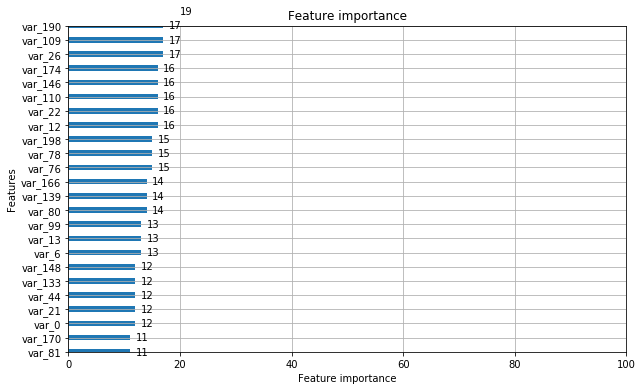

In [16]:
import matplotlib.pyplot as plt
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [17]:
sorted(gbm.feature_importances_,reverse=True)


[19,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
temp = 0 
total = sum(gbm.feature_importances_)
for feature in sorted(gbm.feature_importances_, reverse=True):
    temp+=feature
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

5 0.85


In [19]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score
from sklearn import metrics

y_pred_prob = gbm.predict_proba(X_test)[:, 1]
auc_roc_0=str(metrics.roc_auc_score(y_test, y_pred_prob)) # store AUC score without dimensionality reduction
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC without dimensionality reduction: 
0.807321997010826


In [20]:
x = x.drop(['var_81','var_170','var_0','var_21','var_44','var_133'], axis=1)


In [21]:

# Remake our test/train set with our reduced dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)
print('Best parameters found by grid search are:', gridsearch.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's l1: 0.180125	valid_0's binary_logloss: 0.322299	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179441	valid_0's binary_logloss: 0.31885	valid_0's auc: 0.692722
[3]	valid_0's l1: 0.178887	valid_0's binary_logloss: 0.316194	valid_0's auc: 0.705373
[4]	valid_0's l1: 0.178259	valid_0's binary_logloss: 0.313419	valid_0's auc: 0.718106
[5]	valid_0's l1: 0.177591	valid_0's binary_logloss: 0.310856	valid_0's auc: 0.729961
[6]	valid_0's l1: 0.177021	valid_0's binary_logloss: 0.308509	valid_0's auc: 0.741051
[7]	valid_0's l1: 0.176501	valid_0's binary_logloss: 0.306736	valid_0's auc: 0.74516
[8]	valid_0's l1: 0.175949	valid_0's binary_logloss: 0.30468	valid_0's auc: 0.750871
[9]	valid_0's l1: 0.175397	valid_0's binary_logloss: 0.302697	valid_0's auc: 0.756371
[10]	valid_0's l1: 0.174879	valid_0's binary_logloss: 0.300896	valid_0's auc: 0.762952
[11]	valid_0's l1: 0.17438	valid_0's binary_logloss: 0.299177	valid_0's auc: 0.76

[5]	valid_0's l1: 0.177828	valid_0's binary_logloss: 0.311113	valid_0's auc: 0.723418
[6]	valid_0's l1: 0.177275	valid_0's binary_logloss: 0.309023	valid_0's auc: 0.732246
[7]	valid_0's l1: 0.17666	valid_0's binary_logloss: 0.306834	valid_0's auc: 0.739192
[8]	valid_0's l1: 0.176046	valid_0's binary_logloss: 0.304671	valid_0's auc: 0.74736
[9]	valid_0's l1: 0.175513	valid_0's binary_logloss: 0.302667	valid_0's auc: 0.752686
[10]	valid_0's l1: 0.174926	valid_0's binary_logloss: 0.300663	valid_0's auc: 0.758512
[11]	valid_0's l1: 0.174405	valid_0's binary_logloss: 0.299083	valid_0's auc: 0.761606
[12]	valid_0's l1: 0.17383	valid_0's binary_logloss: 0.297387	valid_0's auc: 0.766616
[13]	valid_0's l1: 0.173353	valid_0's binary_logloss: 0.295957	valid_0's auc: 0.769578
[14]	valid_0's l1: 0.172758	valid_0's binary_logloss: 0.294285	valid_0's auc: 0.773635
[15]	valid_0's l1: 0.172284	valid_0's binary_logloss: 0.292813	valid_0's auc: 0.777821
[16]	valid_0's l1: 0.171809	valid_0's binary_loglos

[1]	valid_0's l1: 0.180138	valid_0's binary_logloss: 0.322278	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179567	valid_0's binary_logloss: 0.319425	valid_0's auc: 0.684397
[3]	valid_0's l1: 0.178944	valid_0's binary_logloss: 0.316414	valid_0's auc: 0.703613
[4]	valid_0's l1: 0.178401	valid_0's binary_logloss: 0.313876	valid_0's auc: 0.715
[5]	valid_0's l1: 0.177765	valid_0's binary_logloss: 0.311098	valid_0's auc: 0.730431
[6]	valid_0's l1: 0.177216	valid_0's binary_logloss: 0.30884	valid_0's auc: 0.738919
[7]	valid_0's l1: 0.176626	valid_0's binary_logloss: 0.306681	valid_0's auc: 0.743481
[8]	valid_0's l1: 0.17612	valid_0's binary_logloss: 0.304884	valid_0's auc: 0.748529
[9]	valid_0's l1: 0.175516	valid_0's binary_logloss: 0.302803	valid_0's auc: 0.754868
[10]	valid_0's l1: 0.174946	valid_0's binary_logloss: 0.300826	valid_0's auc: 0.761632
[11]	valid_0's l1: 0.174458	valid_0's binary_logloss: 0.299263	valid_0's auc: 0.763

[13]	valid_0's l1: 0.173464	valid_0's binary_logloss: 0.296133	valid_0's auc: 0.772542
[14]	valid_0's l1: 0.172937	valid_0's binary_logloss: 0.29462	valid_0's auc: 0.776407
[15]	valid_0's l1: 0.172473	valid_0's binary_logloss: 0.293335	valid_0's auc: 0.779882
[16]	valid_0's l1: 0.172005	valid_0's binary_logloss: 0.292103	valid_0's auc: 0.781729
[17]	valid_0's l1: 0.171559	valid_0's binary_logloss: 0.290783	valid_0's auc: 0.784818
[18]	valid_0's l1: 0.171203	valid_0's binary_logloss: 0.28975	valid_0's auc: 0.787124
[19]	valid_0's l1: 0.170737	valid_0's binary_logloss: 0.28859	valid_0's auc: 0.78951
[20]	valid_0's l1: 0.170307	valid_0's binary_logloss: 0.287594	valid_0's auc: 0.791649
[21]	valid_0's l1: 0.169813	valid_0's binary_logloss: 0.286296	valid_0's auc: 0.794496
[22]	valid_0's l1: 0.169362	valid_0's binary_logloss: 0.285092	valid_0's auc: 0.797141
[23]	valid_0's l1: 0.168968	valid_0's binary_logloss: 0.284085	valid_0's auc: 0.799198
[24]	valid_0's l1: 0.168511	valid_0's binary_lo

[21]	valid_0's l1: 0.169813	valid_0's binary_logloss: 0.286296	valid_0's auc: 0.794496
[22]	valid_0's l1: 0.169362	valid_0's binary_logloss: 0.285092	valid_0's auc: 0.797141
[23]	valid_0's l1: 0.168968	valid_0's binary_logloss: 0.284085	valid_0's auc: 0.799198
[24]	valid_0's l1: 0.168511	valid_0's binary_logloss: 0.282978	valid_0's auc: 0.801597
[25]	valid_0's l1: 0.168122	valid_0's binary_logloss: 0.281972	valid_0's auc: 0.8036
[26]	valid_0's l1: 0.167747	valid_0's binary_logloss: 0.281147	valid_0's auc: 0.805015
[27]	valid_0's l1: 0.167398	valid_0's binary_logloss: 0.280327	valid_0's auc: 0.806687
[28]	valid_0's l1: 0.166952	valid_0's binary_logloss: 0.279312	valid_0's auc: 0.808553
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.166952	valid_0's binary_logloss: 0.279312	valid_0's auc: 0.808553
[1]	valid_0's l1: 0.180125	valid_0's binary_logloss: 0.322299	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.1794

[23]	valid_0's l1: 0.168968	valid_0's binary_logloss: 0.284085	valid_0's auc: 0.799198
[24]	valid_0's l1: 0.168511	valid_0's binary_logloss: 0.282978	valid_0's auc: 0.801597
[25]	valid_0's l1: 0.168122	valid_0's binary_logloss: 0.281972	valid_0's auc: 0.8036
[26]	valid_0's l1: 0.167747	valid_0's binary_logloss: 0.281147	valid_0's auc: 0.805015
[27]	valid_0's l1: 0.167398	valid_0's binary_logloss: 0.280327	valid_0's auc: 0.806687
[28]	valid_0's l1: 0.166952	valid_0's binary_logloss: 0.279312	valid_0's auc: 0.808553
[29]	valid_0's l1: 0.166554	valid_0's binary_logloss: 0.278365	valid_0's auc: 0.810222
[30]	valid_0's l1: 0.166166	valid_0's binary_logloss: 0.2775	valid_0's auc: 0.811439
Did not meet early stopping. Best iteration is:
[30]	valid_0's l1: 0.166166	valid_0's binary_logloss: 0.2775	valid_0's auc: 0.811439
[1]	valid_0's l1: 0.180125	valid_0's binary_logloss: 0.322299	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179441	v

[19]	valid_0's l1: 0.170737	valid_0's binary_logloss: 0.28859	valid_0's auc: 0.78951
[20]	valid_0's l1: 0.170307	valid_0's binary_logloss: 0.287594	valid_0's auc: 0.791649
[21]	valid_0's l1: 0.169813	valid_0's binary_logloss: 0.286296	valid_0's auc: 0.794496
[22]	valid_0's l1: 0.169362	valid_0's binary_logloss: 0.285092	valid_0's auc: 0.797141
[23]	valid_0's l1: 0.168968	valid_0's binary_logloss: 0.284085	valid_0's auc: 0.799198
[24]	valid_0's l1: 0.168511	valid_0's binary_logloss: 0.282978	valid_0's auc: 0.801597
[25]	valid_0's l1: 0.168122	valid_0's binary_logloss: 0.281972	valid_0's auc: 0.8036
[26]	valid_0's l1: 0.167747	valid_0's binary_logloss: 0.281147	valid_0's auc: 0.805015
[27]	valid_0's l1: 0.167398	valid_0's binary_logloss: 0.280327	valid_0's auc: 0.806687
[28]	valid_0's l1: 0.166952	valid_0's binary_logloss: 0.279312	valid_0's auc: 0.808553
[29]	valid_0's l1: 0.166554	valid_0's binary_logloss: 0.278365	valid_0's auc: 0.810222
[30]	valid_0's l1: 0.166166	valid_0's binary_lo

[9]	valid_0's l1: 0.175516	valid_0's binary_logloss: 0.302803	valid_0's auc: 0.754868
[10]	valid_0's l1: 0.174946	valid_0's binary_logloss: 0.300826	valid_0's auc: 0.761632
[11]	valid_0's l1: 0.174458	valid_0's binary_logloss: 0.299263	valid_0's auc: 0.763802
[12]	valid_0's l1: 0.173933	valid_0's binary_logloss: 0.297559	valid_0's auc: 0.769114
[13]	valid_0's l1: 0.173464	valid_0's binary_logloss: 0.296133	valid_0's auc: 0.772542
[14]	valid_0's l1: 0.172937	valid_0's binary_logloss: 0.29462	valid_0's auc: 0.776407
[15]	valid_0's l1: 0.172473	valid_0's binary_logloss: 0.293335	valid_0's auc: 0.779882
[16]	valid_0's l1: 0.172005	valid_0's binary_logloss: 0.292103	valid_0's auc: 0.781729
[17]	valid_0's l1: 0.171559	valid_0's binary_logloss: 0.290783	valid_0's auc: 0.784818
[18]	valid_0's l1: 0.171203	valid_0's binary_logloss: 0.28975	valid_0's auc: 0.787124
[19]	valid_0's l1: 0.170737	valid_0's binary_logloss: 0.28859	valid_0's auc: 0.78951
[20]	valid_0's l1: 0.170307	valid_0's binary_log

[3]	valid_0's l1: 0.178515	valid_0's binary_logloss: 0.314158	valid_0's auc: 0.710867
[4]	valid_0's l1: 0.177781	valid_0's binary_logloss: 0.311155	valid_0's auc: 0.725296
[5]	valid_0's l1: 0.177048	valid_0's binary_logloss: 0.308309	valid_0's auc: 0.735547
[6]	valid_0's l1: 0.17642	valid_0's binary_logloss: 0.306046	valid_0's auc: 0.740466
[7]	valid_0's l1: 0.175727	valid_0's binary_logloss: 0.30376	valid_0's auc: 0.745853
[8]	valid_0's l1: 0.175045	valid_0's binary_logloss: 0.30162	valid_0's auc: 0.753179
[9]	valid_0's l1: 0.174344	valid_0's binary_logloss: 0.299599	valid_0's auc: 0.756666
[10]	valid_0's l1: 0.173792	valid_0's binary_logloss: 0.297905	valid_0's auc: 0.761451
[11]	valid_0's l1: 0.173185	valid_0's binary_logloss: 0.296137	valid_0's auc: 0.765961
[12]	valid_0's l1: 0.172562	valid_0's binary_logloss: 0.29432	valid_0's auc: 0.770895
[13]	valid_0's l1: 0.171967	valid_0's binary_logloss: 0.292571	valid_0's auc: 0.775874
[14]	valid_0's l1: 0.171382	valid_0's binary_logloss: 

[1]	valid_0's l1: 0.180088	valid_0's binary_logloss: 0.321575	valid_0's auc: 0.665567
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179388	valid_0's binary_logloss: 0.318059	valid_0's auc: 0.686146
[3]	valid_0's l1: 0.178575	valid_0's binary_logloss: 0.314199	valid_0's auc: 0.710458
[4]	valid_0's l1: 0.17786	valid_0's binary_logloss: 0.311272	valid_0's auc: 0.721981
[5]	valid_0's l1: 0.177153	valid_0's binary_logloss: 0.308704	valid_0's auc: 0.729209
[6]	valid_0's l1: 0.176408	valid_0's binary_logloss: 0.305861	valid_0's auc: 0.740793
[7]	valid_0's l1: 0.175646	valid_0's binary_logloss: 0.303382	valid_0's auc: 0.748828
[8]	valid_0's l1: 0.174923	valid_0's binary_logloss: 0.301301	valid_0's auc: 0.753194
[9]	valid_0's l1: 0.174186	valid_0's binary_logloss: 0.299131	valid_0's auc: 0.757584
[10]	valid_0's l1: 0.173571	valid_0's binary_logloss: 0.297282	valid_0's auc: 0.762821
[11]	valid_0's l1: 0.172919	valid_0's binary_logloss: 0.295567	valid_0's auc: 0

[15]	valid_0's l1: 0.17053	valid_0's binary_logloss: 0.289186	valid_0's auc: 0.782121
[16]	valid_0's l1: 0.169931	valid_0's binary_logloss: 0.287677	valid_0's auc: 0.784956
[17]	valid_0's l1: 0.16938	valid_0's binary_logloss: 0.286219	valid_0's auc: 0.789096
[18]	valid_0's l1: 0.168849	valid_0's binary_logloss: 0.284804	valid_0's auc: 0.792489
[19]	valid_0's l1: 0.168274	valid_0's binary_logloss: 0.283409	valid_0's auc: 0.795344
[20]	valid_0's l1: 0.167778	valid_0's binary_logloss: 0.282312	valid_0's auc: 0.797048
[21]	valid_0's l1: 0.167266	valid_0's binary_logloss: 0.28124	valid_0's auc: 0.799186
[22]	valid_0's l1: 0.166829	valid_0's binary_logloss: 0.280311	valid_0's auc: 0.801221
[23]	valid_0's l1: 0.166275	valid_0's binary_logloss: 0.279135	valid_0's auc: 0.803524
[24]	valid_0's l1: 0.165712	valid_0's binary_logloss: 0.27803	valid_0's auc: 0.805052
[25]	valid_0's l1: 0.165304	valid_0's binary_logloss: 0.277049	valid_0's auc: 0.807678
[26]	valid_0's l1: 0.164835	valid_0's binary_lo

[25]	valid_0's l1: 0.165304	valid_0's binary_logloss: 0.277049	valid_0's auc: 0.807678
[26]	valid_0's l1: 0.164835	valid_0's binary_logloss: 0.276034	valid_0's auc: 0.809483
[27]	valid_0's l1: 0.164324	valid_0's binary_logloss: 0.275004	valid_0's auc: 0.811303
[28]	valid_0's l1: 0.16389	valid_0's binary_logloss: 0.274048	valid_0's auc: 0.813048
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.16389	valid_0's binary_logloss: 0.274048	valid_0's auc: 0.813048
[1]	valid_0's l1: 0.180003	valid_0's binary_logloss: 0.32136	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179294	valid_0's binary_logloss: 0.317892	valid_0's auc: 0.686642
[3]	valid_0's l1: 0.178646	valid_0's binary_logloss: 0.31488	valid_0's auc: 0.703655
[4]	valid_0's l1: 0.177906	valid_0's binary_logloss: 0.311837	valid_0's auc: 0.715759
[5]	valid_0's l1: 0.177214	valid_0's binary_logloss: 0.308636	valid_0's auc: 0.732554
[6]	valid_0's l1: 0.176615	val

[29]	valid_0's l1: 0.163427	valid_0's binary_logloss: 0.27311	valid_0's auc: 0.81428
[30]	valid_0's l1: 0.162993	valid_0's binary_logloss: 0.272208	valid_0's auc: 0.815616
Did not meet early stopping. Best iteration is:
[30]	valid_0's l1: 0.162993	valid_0's binary_logloss: 0.272208	valid_0's auc: 0.815616
[1]	valid_0's l1: 0.180003	valid_0's binary_logloss: 0.32136	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179294	valid_0's binary_logloss: 0.317892	valid_0's auc: 0.686642
[3]	valid_0's l1: 0.178646	valid_0's binary_logloss: 0.31488	valid_0's auc: 0.703655
[4]	valid_0's l1: 0.177906	valid_0's binary_logloss: 0.311837	valid_0's auc: 0.715759
[5]	valid_0's l1: 0.177214	valid_0's binary_logloss: 0.308636	valid_0's auc: 0.732554
[6]	valid_0's l1: 0.176615	valid_0's binary_logloss: 0.306241	valid_0's auc: 0.74108
[7]	valid_0's l1: 0.175955	valid_0's binary_logloss: 0.303929	valid_0's auc: 0.746526
[8]	valid_0's l1: 0.175208	valid_

[27]	valid_0's l1: 0.164324	valid_0's binary_logloss: 0.275004	valid_0's auc: 0.811303
[28]	valid_0's l1: 0.16389	valid_0's binary_logloss: 0.274048	valid_0's auc: 0.813048
[29]	valid_0's l1: 0.163427	valid_0's binary_logloss: 0.27311	valid_0's auc: 0.81428
[30]	valid_0's l1: 0.162993	valid_0's binary_logloss: 0.272208	valid_0's auc: 0.815616
[31]	valid_0's l1: 0.162522	valid_0's binary_logloss: 0.271247	valid_0's auc: 0.816835
[32]	valid_0's l1: 0.162064	valid_0's binary_logloss: 0.270299	valid_0's auc: 0.818799
Did not meet early stopping. Best iteration is:
[32]	valid_0's l1: 0.162064	valid_0's binary_logloss: 0.270299	valid_0's auc: 0.818799
[1]	valid_0's l1: 0.180003	valid_0's binary_logloss: 0.32136	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179294	valid_0's binary_logloss: 0.317892	valid_0's auc: 0.686642
[3]	valid_0's l1: 0.178646	valid_0's binary_logloss: 0.31488	valid_0's auc: 0.703655
[4]	valid_0's l1: 0.177906	va

[19]	valid_0's l1: 0.168274	valid_0's binary_logloss: 0.283409	valid_0's auc: 0.795344
[20]	valid_0's l1: 0.167778	valid_0's binary_logloss: 0.282312	valid_0's auc: 0.797048
[21]	valid_0's l1: 0.167266	valid_0's binary_logloss: 0.28124	valid_0's auc: 0.799186
[22]	valid_0's l1: 0.166829	valid_0's binary_logloss: 0.280311	valid_0's auc: 0.801221
[23]	valid_0's l1: 0.166275	valid_0's binary_logloss: 0.279135	valid_0's auc: 0.803524
[24]	valid_0's l1: 0.165712	valid_0's binary_logloss: 0.27803	valid_0's auc: 0.805052
[25]	valid_0's l1: 0.165304	valid_0's binary_logloss: 0.277049	valid_0's auc: 0.807678
[26]	valid_0's l1: 0.164835	valid_0's binary_logloss: 0.276034	valid_0's auc: 0.809483
[27]	valid_0's l1: 0.164324	valid_0's binary_logloss: 0.275004	valid_0's auc: 0.811303
[28]	valid_0's l1: 0.16389	valid_0's binary_logloss: 0.274048	valid_0's auc: 0.813048
[29]	valid_0's l1: 0.163427	valid_0's binary_logloss: 0.27311	valid_0's auc: 0.81428
[30]	valid_0's l1: 0.162993	valid_0's binary_log

[1]	valid_0's l1: 0.179883	valid_0's binary_logloss: 0.320478	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179131	valid_0's binary_logloss: 0.316703	valid_0's auc: 0.685129
[3]	valid_0's l1: 0.178381	valid_0's binary_logloss: 0.31311	valid_0's auc: 0.703654
[4]	valid_0's l1: 0.177535	valid_0's binary_logloss: 0.309613	valid_0's auc: 0.724585
[5]	valid_0's l1: 0.176662	valid_0's binary_logloss: 0.306536	valid_0's auc: 0.734267
[6]	valid_0's l1: 0.175918	valid_0's binary_logloss: 0.30384	valid_0's auc: 0.74368
[7]	valid_0's l1: 0.175075	valid_0's binary_logloss: 0.301207	valid_0's auc: 0.750714
[8]	valid_0's l1: 0.174295	valid_0's binary_logloss: 0.29879	valid_0's auc: 0.757659
[9]	valid_0's l1: 0.173546	valid_0's binary_logloss: 0.296439	valid_0's auc: 0.764894
[10]	valid_0's l1: 0.172811	valid_0's binary_logloss: 0.294222	valid_0's auc: 0.770024
[11]	valid_0's l1: 0.172124	valid_0's binary_logloss: 0.292458	valid_0's auc: 0.77

[1]	valid_0's l1: 0.179872	valid_0's binary_logloss: 0.320528	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178954	valid_0's binary_logloss: 0.316157	valid_0's auc: 0.693285
[3]	valid_0's l1: 0.178157	valid_0's binary_logloss: 0.312417	valid_0's auc: 0.713449
[4]	valid_0's l1: 0.177319	valid_0's binary_logloss: 0.309093	valid_0's auc: 0.727117
[5]	valid_0's l1: 0.176391	valid_0's binary_logloss: 0.305775	valid_0's auc: 0.739828
[6]	valid_0's l1: 0.175492	valid_0's binary_logloss: 0.302901	valid_0's auc: 0.747889
[7]	valid_0's l1: 0.174656	valid_0's binary_logloss: 0.30011	valid_0's auc: 0.758767
[8]	valid_0's l1: 0.173733	valid_0's binary_logloss: 0.297349	valid_0's auc: 0.767697
[9]	valid_0's l1: 0.17297	valid_0's binary_logloss: 0.295061	valid_0's auc: 0.773773
[10]	valid_0's l1: 0.172281	valid_0's binary_logloss: 0.293244	valid_0's auc: 0.777744
[11]	valid_0's l1: 0.171555	valid_0's binary_logloss: 0.291361	valid_0's auc: 0.

[17]	valid_0's l1: 0.167555	valid_0's binary_logloss: 0.281716	valid_0's auc: 0.799759
[18]	valid_0's l1: 0.166958	valid_0's binary_logloss: 0.280272	valid_0's auc: 0.803352
[19]	valid_0's l1: 0.166321	valid_0's binary_logloss: 0.278916	valid_0's auc: 0.805801
[20]	valid_0's l1: 0.165725	valid_0's binary_logloss: 0.277591	valid_0's auc: 0.807479
[21]	valid_0's l1: 0.165074	valid_0's binary_logloss: 0.27613	valid_0's auc: 0.810542
[22]	valid_0's l1: 0.164522	valid_0's binary_logloss: 0.27478	valid_0's auc: 0.813509
[23]	valid_0's l1: 0.163962	valid_0's binary_logloss: 0.273712	valid_0's auc: 0.815003
[24]	valid_0's l1: 0.163416	valid_0's binary_logloss: 0.272551	valid_0's auc: 0.817029
[25]	valid_0's l1: 0.162876	valid_0's binary_logloss: 0.271606	valid_0's auc: 0.818128
[26]	valid_0's l1: 0.162404	valid_0's binary_logloss: 0.270736	valid_0's auc: 0.819826
Did not meet early stopping. Best iteration is:
[26]	valid_0's l1: 0.162404	valid_0's binary_logloss: 0.270736	valid_0's auc: 0.8198

[27]	valid_0's l1: 0.161839	valid_0's binary_logloss: 0.26963	valid_0's auc: 0.821353
[28]	valid_0's l1: 0.16131	valid_0's binary_logloss: 0.268526	valid_0's auc: 0.823425
Did not meet early stopping. Best iteration is:
[28]	valid_0's l1: 0.16131	valid_0's binary_logloss: 0.268526	valid_0's auc: 0.823425
[1]	valid_0's l1: 0.179992	valid_0's binary_logloss: 0.320739	valid_0's auc: 0.665567
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179192	valid_0's binary_logloss: 0.31643	valid_0's auc: 0.689377
[3]	valid_0's l1: 0.178303	valid_0's binary_logloss: 0.312631	valid_0's auc: 0.706415
[4]	valid_0's l1: 0.177437	valid_0's binary_logloss: 0.30898	valid_0's auc: 0.723499
[5]	valid_0's l1: 0.176548	valid_0's binary_logloss: 0.305904	valid_0's auc: 0.731876
[6]	valid_0's l1: 0.175694	valid_0's binary_logloss: 0.303312	valid_0's auc: 0.73874
[7]	valid_0's l1: 0.174814	valid_0's binary_logloss: 0.300526	valid_0's auc: 0.747616
[8]	valid_0's l1: 0.173951	valid_0

[1]	valid_0's l1: 0.179992	valid_0's binary_logloss: 0.320739	valid_0's auc: 0.665567
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179192	valid_0's binary_logloss: 0.31643	valid_0's auc: 0.689377
[3]	valid_0's l1: 0.178303	valid_0's binary_logloss: 0.312631	valid_0's auc: 0.706415
[4]	valid_0's l1: 0.177437	valid_0's binary_logloss: 0.30898	valid_0's auc: 0.723499
[5]	valid_0's l1: 0.176548	valid_0's binary_logloss: 0.305904	valid_0's auc: 0.731876
[6]	valid_0's l1: 0.175694	valid_0's binary_logloss: 0.303312	valid_0's auc: 0.73874
[7]	valid_0's l1: 0.174814	valid_0's binary_logloss: 0.300526	valid_0's auc: 0.747616
[8]	valid_0's l1: 0.173951	valid_0's binary_logloss: 0.297821	valid_0's auc: 0.755006
[9]	valid_0's l1: 0.1731	valid_0's binary_logloss: 0.295279	valid_0's auc: 0.76193
[10]	valid_0's l1: 0.172304	valid_0's binary_logloss: 0.293207	valid_0's auc: 0.767243
[11]	valid_0's l1: 0.171595	valid_0's binary_logloss: 0.291447	valid_0's auc: 0.7721

[31]	valid_0's l1: 0.159838	valid_0's binary_logloss: 0.265835	valid_0's auc: 0.827158
[32]	valid_0's l1: 0.159372	valid_0's binary_logloss: 0.265055	valid_0's auc: 0.827868
Did not meet early stopping. Best iteration is:
[32]	valid_0's l1: 0.159372	valid_0's binary_logloss: 0.265055	valid_0's auc: 0.827868
[1]	valid_0's l1: 0.179992	valid_0's binary_logloss: 0.320739	valid_0's auc: 0.665567
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179192	valid_0's binary_logloss: 0.31643	valid_0's auc: 0.689377
[3]	valid_0's l1: 0.178303	valid_0's binary_logloss: 0.312631	valid_0's auc: 0.706415
[4]	valid_0's l1: 0.177437	valid_0's binary_logloss: 0.30898	valid_0's auc: 0.723499
[5]	valid_0's l1: 0.176548	valid_0's binary_logloss: 0.305904	valid_0's auc: 0.731876
[6]	valid_0's l1: 0.175694	valid_0's binary_logloss: 0.303312	valid_0's auc: 0.73874
[7]	valid_0's l1: 0.174814	valid_0's binary_logloss: 0.300526	valid_0's auc: 0.747616
[8]	valid_0's l1: 0.173951	vali

[23]	valid_0's l1: 0.163962	valid_0's binary_logloss: 0.273712	valid_0's auc: 0.815003
[24]	valid_0's l1: 0.163416	valid_0's binary_logloss: 0.272551	valid_0's auc: 0.817029
[25]	valid_0's l1: 0.162876	valid_0's binary_logloss: 0.271606	valid_0's auc: 0.818128
[26]	valid_0's l1: 0.162404	valid_0's binary_logloss: 0.270736	valid_0's auc: 0.819826
[27]	valid_0's l1: 0.161839	valid_0's binary_logloss: 0.26963	valid_0's auc: 0.821353
[28]	valid_0's l1: 0.16131	valid_0's binary_logloss: 0.268526	valid_0's auc: 0.823425
[29]	valid_0's l1: 0.160753	valid_0's binary_logloss: 0.26752	valid_0's auc: 0.824743
[30]	valid_0's l1: 0.160262	valid_0's binary_logloss: 0.26666	valid_0's auc: 0.826093
[31]	valid_0's l1: 0.159838	valid_0's binary_logloss: 0.265835	valid_0's auc: 0.827158
[32]	valid_0's l1: 0.159372	valid_0's binary_logloss: 0.265055	valid_0's auc: 0.827868
[33]	valid_0's l1: 0.158855	valid_0's binary_logloss: 0.26416	valid_0's auc: 0.828962
[34]	valid_0's l1: 0.158458	valid_0's binary_log

[9]	valid_0's l1: 0.172077	valid_0's binary_logloss: 0.292626	valid_0's auc: 0.76999
[10]	valid_0's l1: 0.171234	valid_0's binary_logloss: 0.290505	valid_0's auc: 0.774634
[11]	valid_0's l1: 0.170447	valid_0's binary_logloss: 0.288469	valid_0's auc: 0.779519
[12]	valid_0's l1: 0.169628	valid_0's binary_logloss: 0.28641	valid_0's auc: 0.785025
[13]	valid_0's l1: 0.168846	valid_0's binary_logloss: 0.284834	valid_0's auc: 0.788111
[14]	valid_0's l1: 0.168153	valid_0's binary_logloss: 0.283169	valid_0's auc: 0.791467
[15]	valid_0's l1: 0.167401	valid_0's binary_logloss: 0.281506	valid_0's auc: 0.794833
[16]	valid_0's l1: 0.166737	valid_0's binary_logloss: 0.280077	valid_0's auc: 0.797498
[17]	valid_0's l1: 0.166078	valid_0's binary_logloss: 0.278671	valid_0's auc: 0.800052
[18]	valid_0's l1: 0.165466	valid_0's binary_logloss: 0.277228	valid_0's auc: 0.803251
[19]	valid_0's l1: 0.164849	valid_0's binary_logloss: 0.276171	valid_0's auc: 0.804584
[20]	valid_0's l1: 0.164232	valid_0's binary_l

[13]	valid_0's l1: 0.168675	valid_0's binary_logloss: 0.284094	valid_0's auc: 0.789727
[14]	valid_0's l1: 0.167948	valid_0's binary_logloss: 0.282443	valid_0's auc: 0.7929
[15]	valid_0's l1: 0.167294	valid_0's binary_logloss: 0.281186	valid_0's auc: 0.794694
[16]	valid_0's l1: 0.166564	valid_0's binary_logloss: 0.27968	valid_0's auc: 0.797374
[17]	valid_0's l1: 0.165925	valid_0's binary_logloss: 0.27833	valid_0's auc: 0.800142
[18]	valid_0's l1: 0.165228	valid_0's binary_logloss: 0.276887	valid_0's auc: 0.80242
[19]	valid_0's l1: 0.164476	valid_0's binary_logloss: 0.275395	valid_0's auc: 0.804803
[20]	valid_0's l1: 0.163872	valid_0's binary_logloss: 0.274204	valid_0's auc: 0.806752
[21]	valid_0's l1: 0.163303	valid_0's binary_logloss: 0.272903	valid_0's auc: 0.80965
[22]	valid_0's l1: 0.162747	valid_0's binary_logloss: 0.271885	valid_0's auc: 0.811565
Did not meet early stopping. Best iteration is:
[22]	valid_0's l1: 0.162747	valid_0's binary_logloss: 0.271885	valid_0's auc: 0.811565
[

[7]	valid_0's l1: 0.17395	valid_0's binary_logloss: 0.297254	valid_0's auc: 0.75937
[8]	valid_0's l1: 0.173041	valid_0's binary_logloss: 0.29455	valid_0's auc: 0.766649
[9]	valid_0's l1: 0.172197	valid_0's binary_logloss: 0.292308	valid_0's auc: 0.771793
[10]	valid_0's l1: 0.171297	valid_0's binary_logloss: 0.290021	valid_0's auc: 0.777038
[11]	valid_0's l1: 0.170487	valid_0's binary_logloss: 0.288048	valid_0's auc: 0.781231
[12]	valid_0's l1: 0.169781	valid_0's binary_logloss: 0.286248	valid_0's auc: 0.786487
[13]	valid_0's l1: 0.168972	valid_0's binary_logloss: 0.284483	valid_0's auc: 0.789858
[14]	valid_0's l1: 0.168199	valid_0's binary_logloss: 0.282757	valid_0's auc: 0.793333
[15]	valid_0's l1: 0.167478	valid_0's binary_logloss: 0.281107	valid_0's auc: 0.79734
[16]	valid_0's l1: 0.166753	valid_0's binary_logloss: 0.279457	valid_0's auc: 0.800574
[17]	valid_0's l1: 0.166057	valid_0's binary_logloss: 0.278104	valid_0's auc: 0.802774
[18]	valid_0's l1: 0.165295	valid_0's binary_loglo

[21]	valid_0's l1: 0.163265	valid_0's binary_logloss: 0.272344	valid_0's auc: 0.811603
[22]	valid_0's l1: 0.162649	valid_0's binary_logloss: 0.271304	valid_0's auc: 0.812805
[23]	valid_0's l1: 0.162013	valid_0's binary_logloss: 0.269942	valid_0's auc: 0.815608
[24]	valid_0's l1: 0.161374	valid_0's binary_logloss: 0.268725	valid_0's auc: 0.817558
[25]	valid_0's l1: 0.16082	valid_0's binary_logloss: 0.267666	valid_0's auc: 0.819371
[26]	valid_0's l1: 0.160198	valid_0's binary_logloss: 0.266528	valid_0's auc: 0.821038
Did not meet early stopping. Best iteration is:
[26]	valid_0's l1: 0.160198	valid_0's binary_logloss: 0.266528	valid_0's auc: 0.821038
[1]	valid_0's l1: 0.179769	valid_0's binary_logloss: 0.319705	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178784	valid_0's binary_logloss: 0.314761	valid_0's auc: 0.694792
[3]	valid_0's l1: 0.177717	valid_0's binary_logloss: 0.310264	valid_0's auc: 0.715196
[4]	valid_0's l1: 0.17672

[1]	valid_0's l1: 0.179769	valid_0's binary_logloss: 0.319705	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178784	valid_0's binary_logloss: 0.314761	valid_0's auc: 0.694792
[3]	valid_0's l1: 0.177717	valid_0's binary_logloss: 0.310264	valid_0's auc: 0.715196
[4]	valid_0's l1: 0.176728	valid_0's binary_logloss: 0.306233	valid_0's auc: 0.734561
[5]	valid_0's l1: 0.175762	valid_0's binary_logloss: 0.302934	valid_0's auc: 0.74471
[6]	valid_0's l1: 0.174792	valid_0's binary_logloss: 0.299737	valid_0's auc: 0.753603
[7]	valid_0's l1: 0.173914	valid_0's binary_logloss: 0.297474	valid_0's auc: 0.759309
[8]	valid_0's l1: 0.172955	valid_0's binary_logloss: 0.294841	valid_0's auc: 0.764927
[9]	valid_0's l1: 0.172077	valid_0's binary_logloss: 0.292626	valid_0's auc: 0.76999
[10]	valid_0's l1: 0.171234	valid_0's binary_logloss: 0.290505	valid_0's auc: 0.774634
[11]	valid_0's l1: 0.170447	valid_0's binary_logloss: 0.288469	valid_0's auc: 0.

[1]	valid_0's l1: 0.179769	valid_0's binary_logloss: 0.319705	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178784	valid_0's binary_logloss: 0.314761	valid_0's auc: 0.694792
[3]	valid_0's l1: 0.177717	valid_0's binary_logloss: 0.310264	valid_0's auc: 0.715196
[4]	valid_0's l1: 0.176728	valid_0's binary_logloss: 0.306233	valid_0's auc: 0.734561
[5]	valid_0's l1: 0.175762	valid_0's binary_logloss: 0.302934	valid_0's auc: 0.74471
[6]	valid_0's l1: 0.174792	valid_0's binary_logloss: 0.299737	valid_0's auc: 0.753603
[7]	valid_0's l1: 0.173914	valid_0's binary_logloss: 0.297474	valid_0's auc: 0.759309
[8]	valid_0's l1: 0.172955	valid_0's binary_logloss: 0.294841	valid_0's auc: 0.764927
[9]	valid_0's l1: 0.172077	valid_0's binary_logloss: 0.292626	valid_0's auc: 0.76999
[10]	valid_0's l1: 0.171234	valid_0's binary_logloss: 0.290505	valid_0's auc: 0.774634
[11]	valid_0's l1: 0.170447	valid_0's binary_logloss: 0.288469	valid_0's auc: 0.

[27]	valid_0's l1: 0.159619	valid_0's binary_logloss: 0.265492	valid_0's auc: 0.822169
[28]	valid_0's l1: 0.159074	valid_0's binary_logloss: 0.26455	valid_0's auc: 0.823679
[29]	valid_0's l1: 0.158448	valid_0's binary_logloss: 0.263394	valid_0's auc: 0.825511
[30]	valid_0's l1: 0.157949	valid_0's binary_logloss: 0.262561	valid_0's auc: 0.826287
[31]	valid_0's l1: 0.157488	valid_0's binary_logloss: 0.261591	valid_0's auc: 0.828305
[32]	valid_0's l1: 0.156981	valid_0's binary_logloss: 0.260703	valid_0's auc: 0.829624
Did not meet early stopping. Best iteration is:
[32]	valid_0's l1: 0.156981	valid_0's binary_logloss: 0.260703	valid_0's auc: 0.829624
[1]	valid_0's l1: 0.179769	valid_0's binary_logloss: 0.319705	valid_0's auc: 0.664894
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.178784	valid_0's binary_logloss: 0.314761	valid_0's auc: 0.694792
[3]	valid_0's l1: 0.177717	valid_0's binary_logloss: 0.310264	valid_0's auc: 0.715196
[4]	valid_0's l1: 0.17672

[17]	valid_0's l1: 0.166057	valid_0's binary_logloss: 0.278104	valid_0's auc: 0.802774
[18]	valid_0's l1: 0.165295	valid_0's binary_logloss: 0.27653	valid_0's auc: 0.805129
[19]	valid_0's l1: 0.164539	valid_0's binary_logloss: 0.275043	valid_0's auc: 0.807236
[20]	valid_0's l1: 0.163889	valid_0's binary_logloss: 0.273659	valid_0's auc: 0.809573
[21]	valid_0's l1: 0.163265	valid_0's binary_logloss: 0.272344	valid_0's auc: 0.811603
[22]	valid_0's l1: 0.162649	valid_0's binary_logloss: 0.271304	valid_0's auc: 0.812805
[23]	valid_0's l1: 0.162013	valid_0's binary_logloss: 0.269942	valid_0's auc: 0.815608
[24]	valid_0's l1: 0.161374	valid_0's binary_logloss: 0.268725	valid_0's auc: 0.817558
[25]	valid_0's l1: 0.16082	valid_0's binary_logloss: 0.267666	valid_0's auc: 0.819371
[26]	valid_0's l1: 0.160198	valid_0's binary_logloss: 0.266528	valid_0's auc: 0.821038
[27]	valid_0's l1: 0.159619	valid_0's binary_logloss: 0.265492	valid_0's auc: 0.822169
[28]	valid_0's l1: 0.159074	valid_0's binary_

[9]	valid_0's l1: 0.170859	valid_0's binary_logloss: 0.289298	valid_0's auc: 0.777423
[10]	valid_0's l1: 0.170004	valid_0's binary_logloss: 0.287449	valid_0's auc: 0.780659
[11]	valid_0's l1: 0.169107	valid_0's binary_logloss: 0.285432	valid_0's auc: 0.785433
[12]	valid_0's l1: 0.168266	valid_0's binary_logloss: 0.283683	valid_0's auc: 0.788415
[13]	valid_0's l1: 0.167523	valid_0's binary_logloss: 0.281986	valid_0's auc: 0.79138
[14]	valid_0's l1: 0.166693	valid_0's binary_logloss: 0.280329	valid_0's auc: 0.793989
[15]	valid_0's l1: 0.165944	valid_0's binary_logloss: 0.278983	valid_0's auc: 0.795983
[16]	valid_0's l1: 0.165142	valid_0's binary_logloss: 0.27737	valid_0's auc: 0.798602
[17]	valid_0's l1: 0.164398	valid_0's binary_logloss: 0.275821	valid_0's auc: 0.801143
[18]	valid_0's l1: 0.163787	valid_0's binary_logloss: 0.27443	valid_0's auc: 0.804448
[19]	valid_0's l1: 0.162983	valid_0's binary_logloss: 0.272831	valid_0's auc: 0.80756
[20]	valid_0's l1: 0.162313	valid_0's binary_log

[5]	valid_0's l1: 0.175371	valid_0's binary_logloss: 0.301616	valid_0's auc: 0.739245
[6]	valid_0's l1: 0.174371	valid_0's binary_logloss: 0.298583	valid_0's auc: 0.74746
[7]	valid_0's l1: 0.173217	valid_0's binary_logloss: 0.295493	valid_0's auc: 0.755609
[8]	valid_0's l1: 0.172302	valid_0's binary_logloss: 0.2933	valid_0's auc: 0.759856
[9]	valid_0's l1: 0.171325	valid_0's binary_logloss: 0.290584	valid_0's auc: 0.768112
[10]	valid_0's l1: 0.170254	valid_0's binary_logloss: 0.28822	valid_0's auc: 0.773358
[11]	valid_0's l1: 0.169323	valid_0's binary_logloss: 0.286145	valid_0's auc: 0.777203
[12]	valid_0's l1: 0.168272	valid_0's binary_logloss: 0.283822	valid_0's auc: 0.78289
[13]	valid_0's l1: 0.167534	valid_0's binary_logloss: 0.282619	valid_0's auc: 0.784675
[14]	valid_0's l1: 0.166625	valid_0's binary_logloss: 0.280662	valid_0's auc: 0.789165
[15]	valid_0's l1: 0.165846	valid_0's binary_logloss: 0.279156	valid_0's auc: 0.791839
[16]	valid_0's l1: 0.165031	valid_0's binary_logloss:

[21]	valid_0's l1: 0.161488	valid_0's binary_logloss: 0.270953	valid_0's auc: 0.806725
[22]	valid_0's l1: 0.160743	valid_0's binary_logloss: 0.269458	valid_0's auc: 0.809784
[23]	valid_0's l1: 0.16016	valid_0's binary_logloss: 0.268461	valid_0's auc: 0.810907
[24]	valid_0's l1: 0.15953	valid_0's binary_logloss: 0.267195	valid_0's auc: 0.813467
[25]	valid_0's l1: 0.158831	valid_0's binary_logloss: 0.266066	valid_0's auc: 0.814972
[26]	valid_0's l1: 0.158261	valid_0's binary_logloss: 0.265061	valid_0's auc: 0.816916
Did not meet early stopping. Best iteration is:
[26]	valid_0's l1: 0.158261	valid_0's binary_logloss: 0.265061	valid_0's auc: 0.816916
[1]	valid_0's l1: 0.179688	valid_0's binary_logloss: 0.318829	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.17869	valid_0's binary_logloss: 0.314136	valid_0's auc: 0.690054
[3]	valid_0's l1: 0.177603	valid_0's binary_logloss: 0.309387	valid_0's auc: 0.712086
[4]	valid_0's l1: 0.176583	

[1]	valid_0's l1: 0.179688	valid_0's binary_logloss: 0.318829	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.17869	valid_0's binary_logloss: 0.314136	valid_0's auc: 0.690054
[3]	valid_0's l1: 0.177603	valid_0's binary_logloss: 0.309387	valid_0's auc: 0.712086
[4]	valid_0's l1: 0.176583	valid_0's binary_logloss: 0.305731	valid_0's auc: 0.728937
[5]	valid_0's l1: 0.175318	valid_0's binary_logloss: 0.301695	valid_0's auc: 0.741606
[6]	valid_0's l1: 0.174141	valid_0's binary_logloss: 0.297952	valid_0's auc: 0.753101
[7]	valid_0's l1: 0.172974	valid_0's binary_logloss: 0.295073	valid_0's auc: 0.759702
[8]	valid_0's l1: 0.171988	valid_0's binary_logloss: 0.292431	valid_0's auc: 0.76786
[9]	valid_0's l1: 0.171129	valid_0's binary_logloss: 0.290068	valid_0's auc: 0.774747
[10]	valid_0's l1: 0.170262	valid_0's binary_logloss: 0.28793	valid_0's auc: 0.779594
[11]	valid_0's l1: 0.169375	valid_0's binary_logloss: 0.285891	valid_0's auc: 0.7

[3]	valid_0's l1: 0.177603	valid_0's binary_logloss: 0.309387	valid_0's auc: 0.712086
[4]	valid_0's l1: 0.176583	valid_0's binary_logloss: 0.305731	valid_0's auc: 0.728937
[5]	valid_0's l1: 0.175318	valid_0's binary_logloss: 0.301695	valid_0's auc: 0.741606
[6]	valid_0's l1: 0.174141	valid_0's binary_logloss: 0.297952	valid_0's auc: 0.753101
[7]	valid_0's l1: 0.172974	valid_0's binary_logloss: 0.295073	valid_0's auc: 0.759702
[8]	valid_0's l1: 0.171988	valid_0's binary_logloss: 0.292431	valid_0's auc: 0.76786
[9]	valid_0's l1: 0.171129	valid_0's binary_logloss: 0.290068	valid_0's auc: 0.774747
[10]	valid_0's l1: 0.170262	valid_0's binary_logloss: 0.28793	valid_0's auc: 0.779594
[11]	valid_0's l1: 0.169375	valid_0's binary_logloss: 0.285891	valid_0's auc: 0.783324
[12]	valid_0's l1: 0.168523	valid_0's binary_logloss: 0.283788	valid_0's auc: 0.788203
[13]	valid_0's l1: 0.167564	valid_0's binary_logloss: 0.281594	valid_0's auc: 0.792675
[14]	valid_0's l1: 0.166643	valid_0's binary_logloss

[1]	valid_0's l1: 0.179688	valid_0's binary_logloss: 0.318829	valid_0's auc: 0.665125
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.17869	valid_0's binary_logloss: 0.314136	valid_0's auc: 0.690054
[3]	valid_0's l1: 0.177603	valid_0's binary_logloss: 0.309387	valid_0's auc: 0.712086
[4]	valid_0's l1: 0.176583	valid_0's binary_logloss: 0.305731	valid_0's auc: 0.728937
[5]	valid_0's l1: 0.175318	valid_0's binary_logloss: 0.301695	valid_0's auc: 0.741606
[6]	valid_0's l1: 0.174141	valid_0's binary_logloss: 0.297952	valid_0's auc: 0.753101
[7]	valid_0's l1: 0.172974	valid_0's binary_logloss: 0.295073	valid_0's auc: 0.759702
[8]	valid_0's l1: 0.171988	valid_0's binary_logloss: 0.292431	valid_0's auc: 0.76786
[9]	valid_0's l1: 0.171129	valid_0's binary_logloss: 0.290068	valid_0's auc: 0.774747
[10]	valid_0's l1: 0.170262	valid_0's binary_logloss: 0.28793	valid_0's auc: 0.779594
[11]	valid_0's l1: 0.169375	valid_0's binary_logloss: 0.285891	valid_0's auc: 0.7

[25]	valid_0's l1: 0.158831	valid_0's binary_logloss: 0.266066	valid_0's auc: 0.814972
[26]	valid_0's l1: 0.158261	valid_0's binary_logloss: 0.265061	valid_0's auc: 0.816916
[27]	valid_0's l1: 0.157688	valid_0's binary_logloss: 0.264071	valid_0's auc: 0.81804
[28]	valid_0's l1: 0.157053	valid_0's binary_logloss: 0.262909	valid_0's auc: 0.820004
[29]	valid_0's l1: 0.156461	valid_0's binary_logloss: 0.261954	valid_0's auc: 0.821427
[30]	valid_0's l1: 0.155912	valid_0's binary_logloss: 0.261034	valid_0's auc: 0.822654
[31]	valid_0's l1: 0.155348	valid_0's binary_logloss: 0.2601	valid_0's auc: 0.824223
[32]	valid_0's l1: 0.154836	valid_0's binary_logloss: 0.25936	valid_0's auc: 0.82503
[33]	valid_0's l1: 0.154289	valid_0's binary_logloss: 0.258444	valid_0's auc: 0.826555
[34]	valid_0's l1: 0.153709	valid_0's binary_logloss: 0.257597	valid_0's auc: 0.827697
Did not meet early stopping. Best iteration is:
[34]	valid_0's l1: 0.153709	valid_0's binary_logloss: 0.257597	valid_0's auc: 0.827697


In [22]:
gbm = lgb.LGBMClassifier(learning_rate = 0.1, metric = 'l1', 
                        n_estimators = 20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's l1: 0.180183	valid_0's binary_logloss: 0.322473	valid_0's auc: 0.66837
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.179563	valid_0's binary_logloss: 0.319382	valid_0's auc: 0.689045
[3]	valid_0's l1: 0.179021	valid_0's binary_logloss: 0.316632	valid_0's auc: 0.706076
[4]	valid_0's l1: 0.178413	valid_0's binary_logloss: 0.31403	valid_0's auc: 0.718671
[5]	valid_0's l1: 0.177868	valid_0's binary_logloss: 0.311559	valid_0's auc: 0.732125
[6]	valid_0's l1: 0.177371	valid_0's binary_logloss: 0.309574	valid_0's auc: 0.738593
[7]	valid_0's l1: 0.176934	valid_0's binary_logloss: 0.307865	valid_0's auc: 0.743829
[8]	valid_0's l1: 0.176388	valid_0's binary_logloss: 0.305952	valid_0's auc: 0.750469
[9]	valid_0's l1: 0.175894	valid_0's binary_logloss: 0.304215	valid_0's auc: 0.757182
[10]	valid_0's l1: 0.175424	valid_0's binary_logloss: 0.30251	valid_0's auc: 0.761462
[11]	valid_0's l1: 0.174967	valid_0's binary_logloss: 0.300884	valid_0's auc: 0.7

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        metric='l1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=20, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [23]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.89945
The roc_auc_score of prediction is: 0.5
The null acccuracy is: 0.89945


In [24]:
# X_test[:,1]

In [25]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]
y_pred_prob


array([0.14678418, 0.09332864, 0.14958982, ..., 0.10777374, 0.10838457,
       0.05847039])

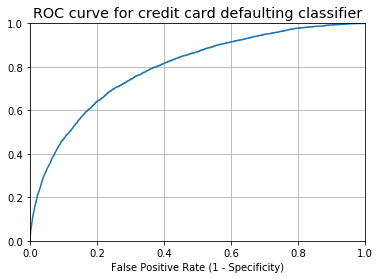

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for credit card defaulting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [27]:

auc_roc_1 = str(metrics.roc_auc_score(y_test, y_pred_prob))
print('AUC with dimensionality reduction: \n' + auc_roc_1)
print('AUC without dimensionality reduction: \n' + auc_roc_0)

AUC with dimensionality reduction: 
0.7956876873675965
AUC without dimensionality reduction: 
0.807321997010826


In [28]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[35978     0]
 [ 4022     0]]


In [29]:
test = pd.read_csv('../input/test.csv')
# test.head()

test = test.iloc[:, 1:]
# test.head(5)
# test.shape
test = test.drop(['var_81','var_170','var_0','var_21','var_44','var_133'], axis=1)
# test.shape


In [30]:
# predictions = np.zeros(len(data["target"]))

predictions = gbm.predict_proba(test)[:,1]
new = pd.read_csv('../input/test.csv')
new = new['ID_code']
# new.head(5)
# predictions.head(5)

In [31]:
# predictions

In [32]:
submission = pd.DataFrame({"ID_code": new, "target": predictions})
# submission = pd.DataFrame({"ID_code": test.Id, "target": redictions})
# submission["target"] = predictions
submission.to_csv("submission.csv", index=False)

In [33]:
submission.head(5)

,ID_code,target
0,test_0,0.147581
1,test_1,0.140775
2,test_2,0.145003
3,test_3,0.067591
4,test_4,0.091810
